In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch

from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')



In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [4]:
wine = pd.read_csv("wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
wine.Type.unique()

array([1, 2, 3])

In [6]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [7]:
wine['ID']= range(1,179,1)
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [8]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
 14  ID               178 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 21.0 KB


In [10]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

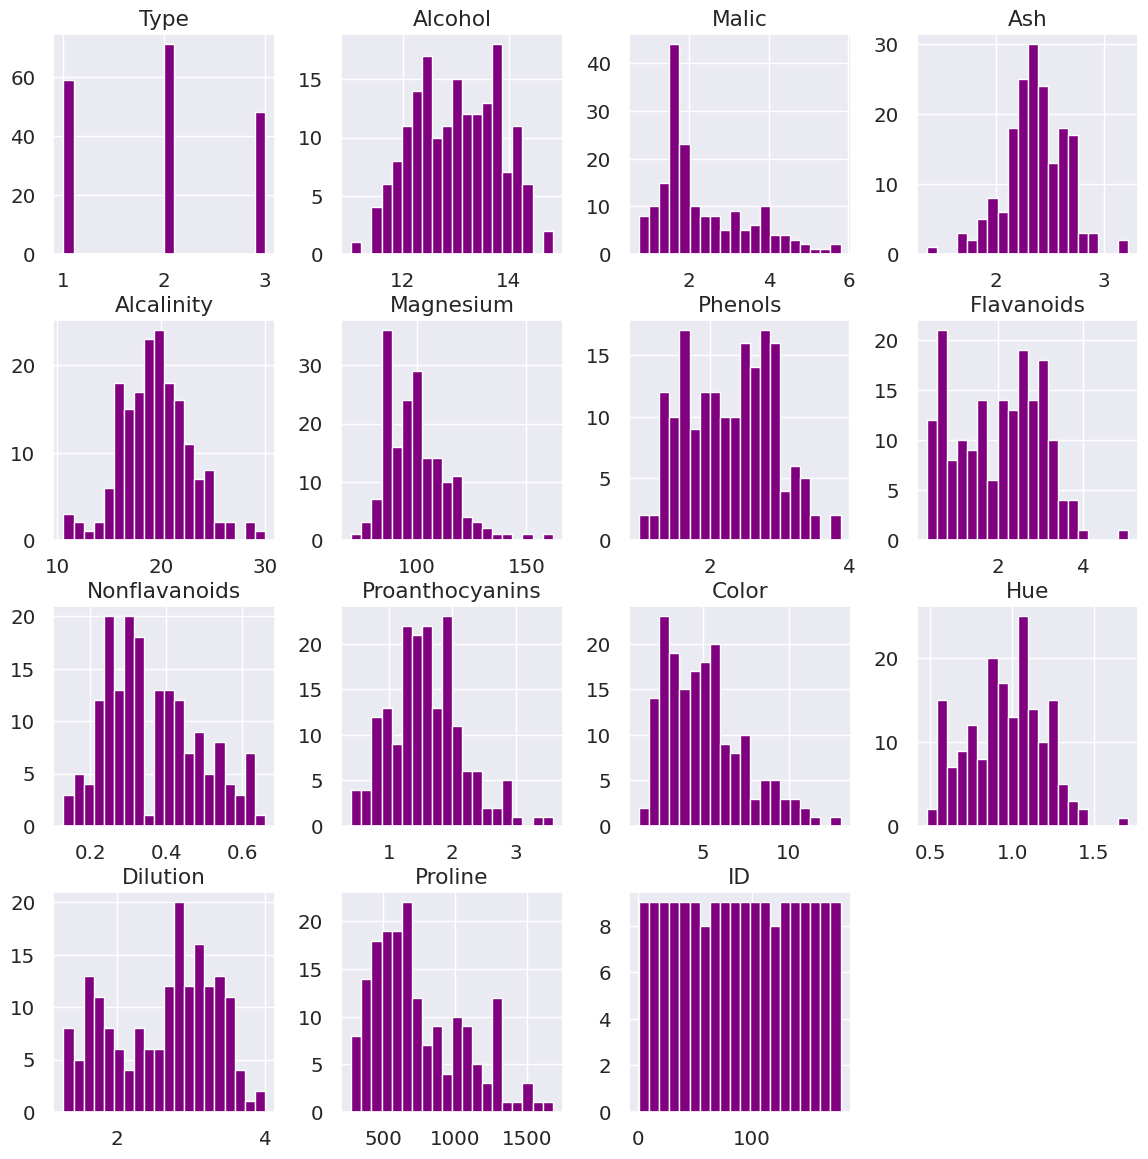

In [12]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(14,14)})
ax= wine.hist(bins=20, color='Purple')

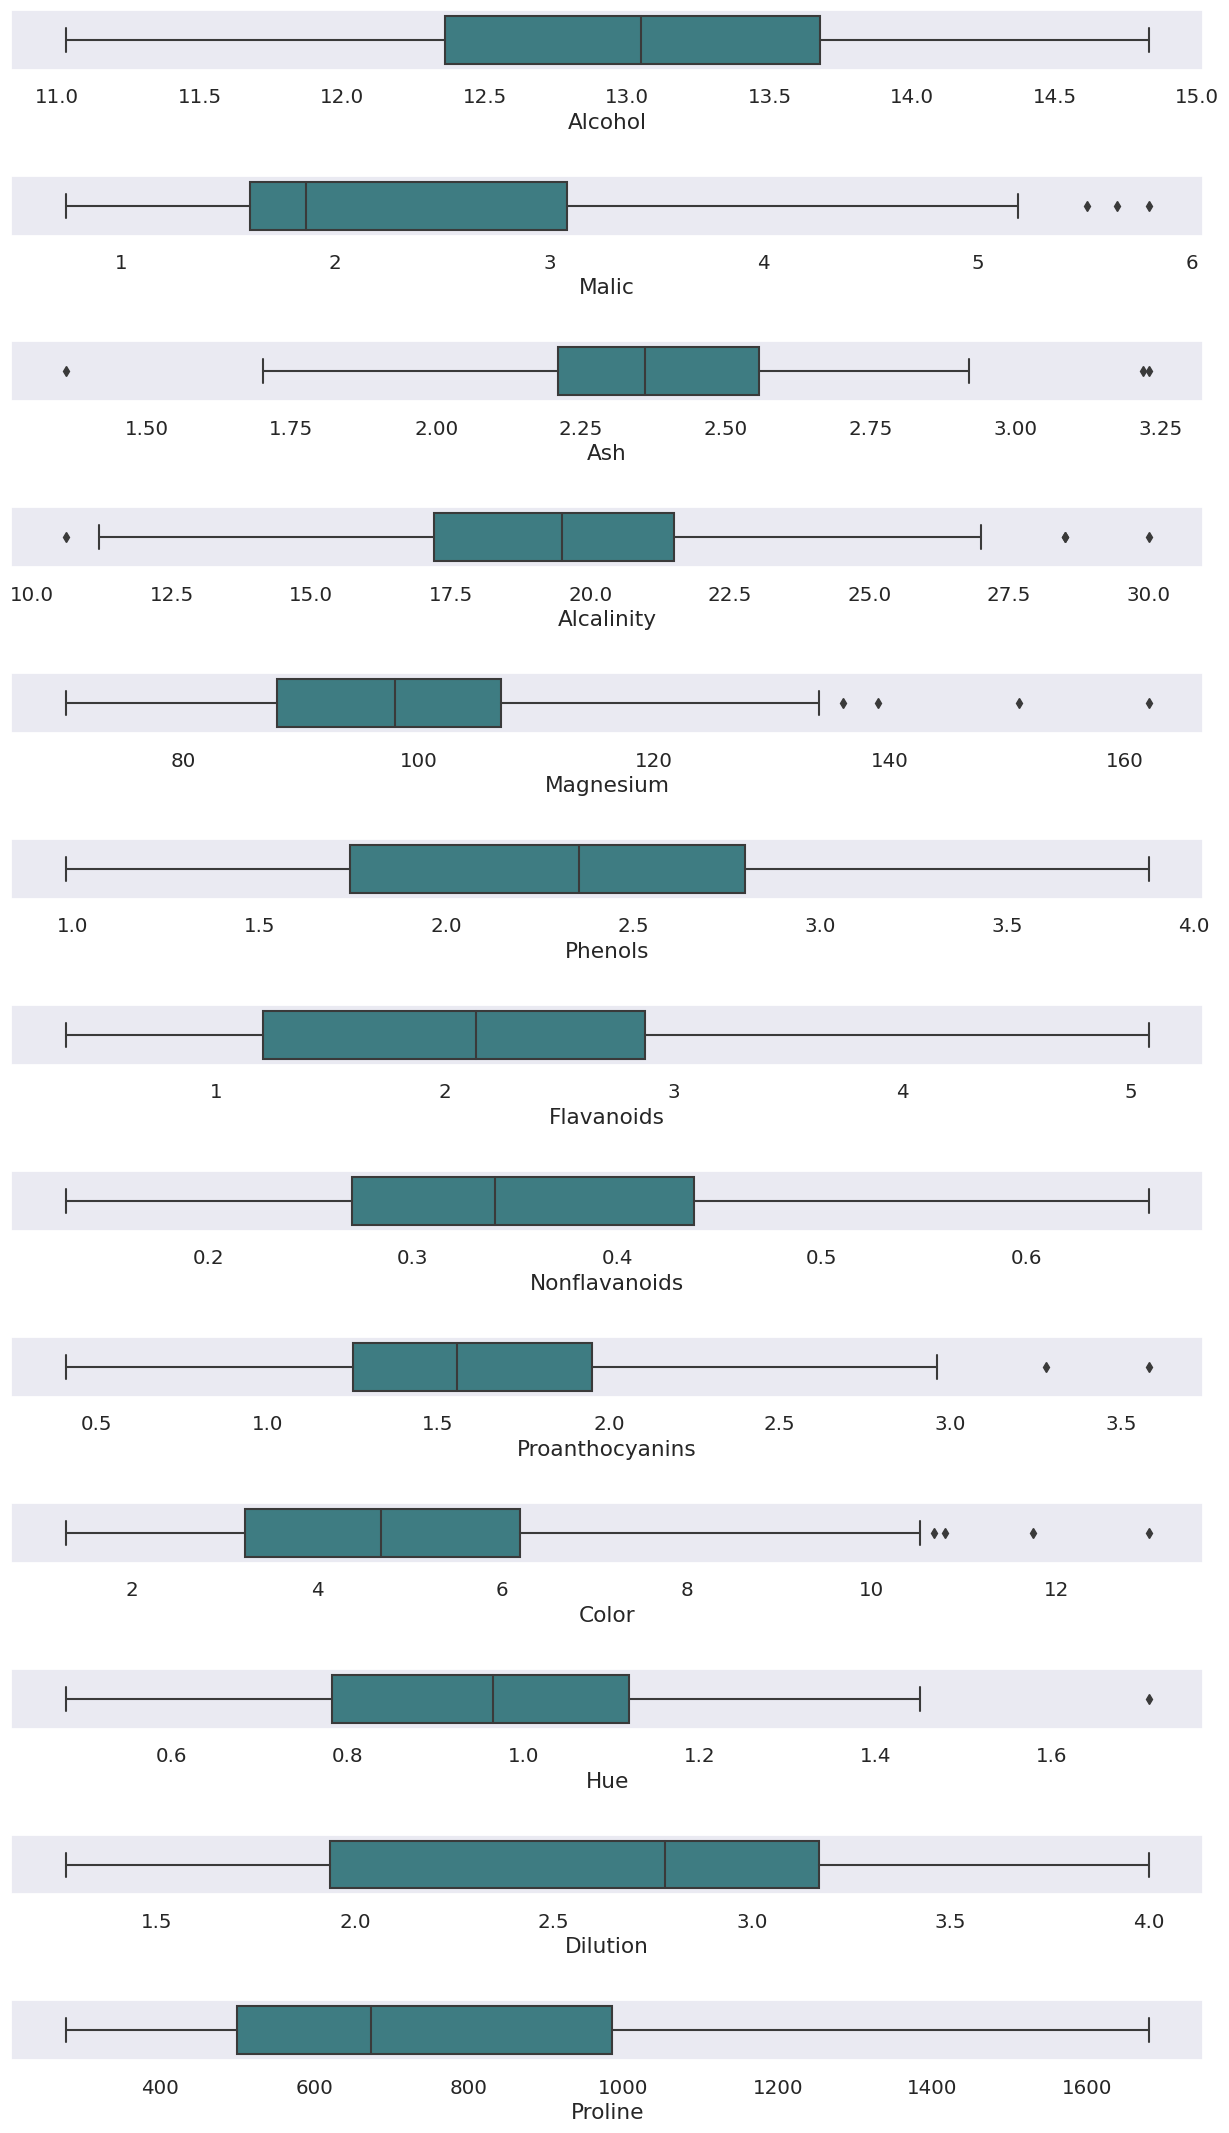

In [15]:
outliers = wine.copy()
fig, axes = plt.subplots(13,1, figsize=(13,22),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=outliers,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=outliers,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=outliers,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=outliers,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=outliers,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=outliers,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=outliers,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=outliers,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=outliers,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=outliers,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=outliers,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=outliers,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=outliers,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

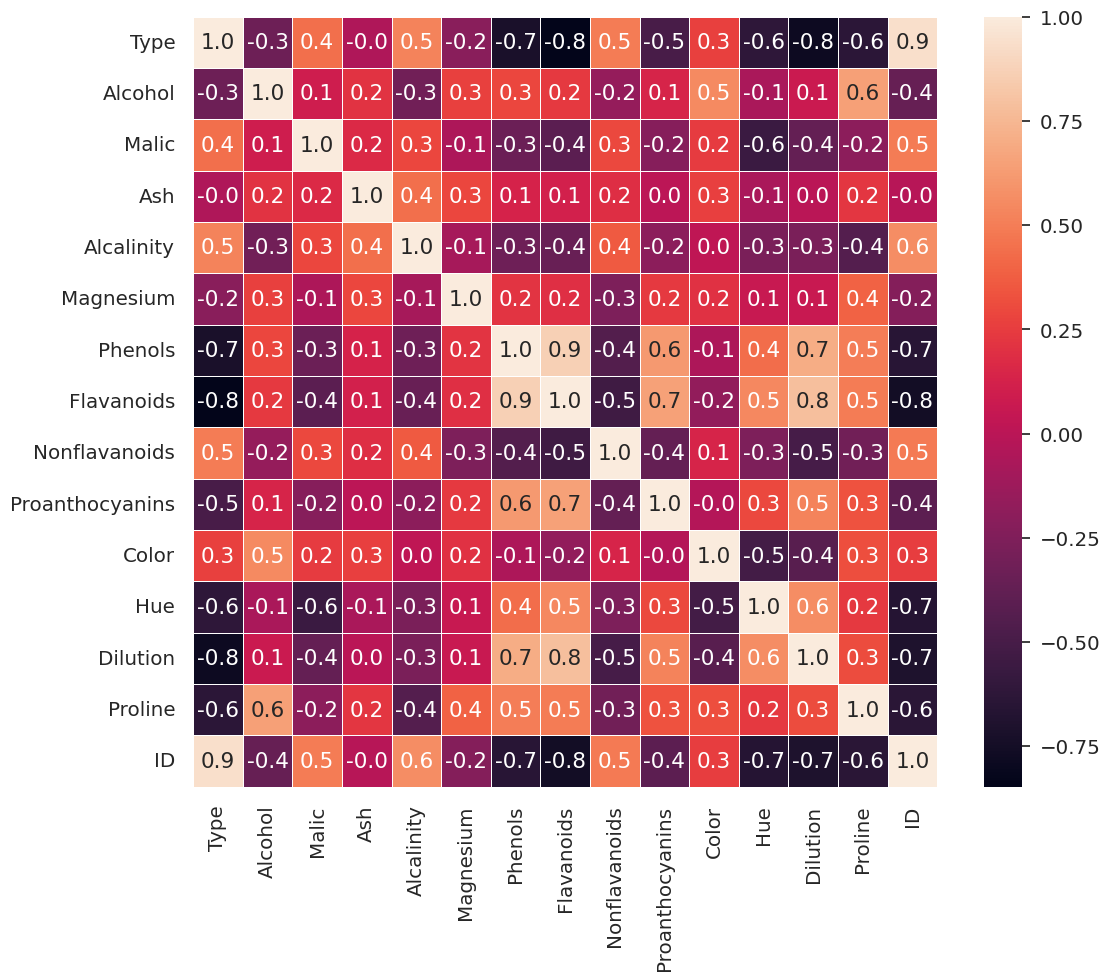

In [18]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(wine.corr(),annot = True, linewidths=.5,fmt='.1f',ax=ax)
plt.show()

Plotting Frequent Flying Phenols Vs Flavanoids

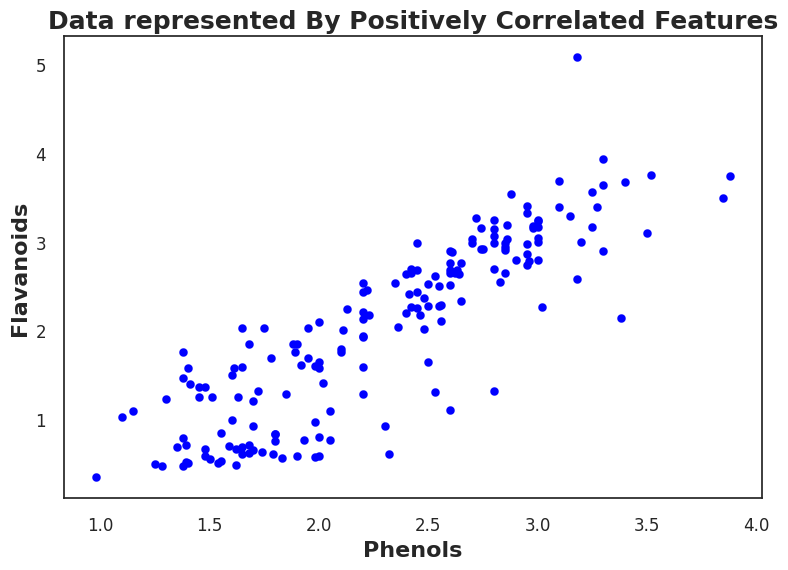

In [24]:
sns.set(style='white',rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=wine['Phenols'],y=wine['Flavanoids'],color='blue', lw=0.1)
plt.xlabel('Phenols',fontweight='bold',fontsize=16)
plt.ylabel('Flavanoids',fontweight='bold',fontsize=16)
plt.title('Data represented By Positively Correlated Features',fontweight='bold',fontsize=18)
plt.show()

In [25]:
wine_data = wine.set_index('ID')
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ID,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
standard_scaler = StandardScaler()
std_wine = standard_scaler.fit_transform(wine_data)
std_wine.shape

(178, 14)

In [27]:
minmax = MinMaxScaler()

norm_wine = minmax.fit_transform(wine_data)
norm_wine.shape

(178, 14)

## **PCA(principal Component Analysis)**

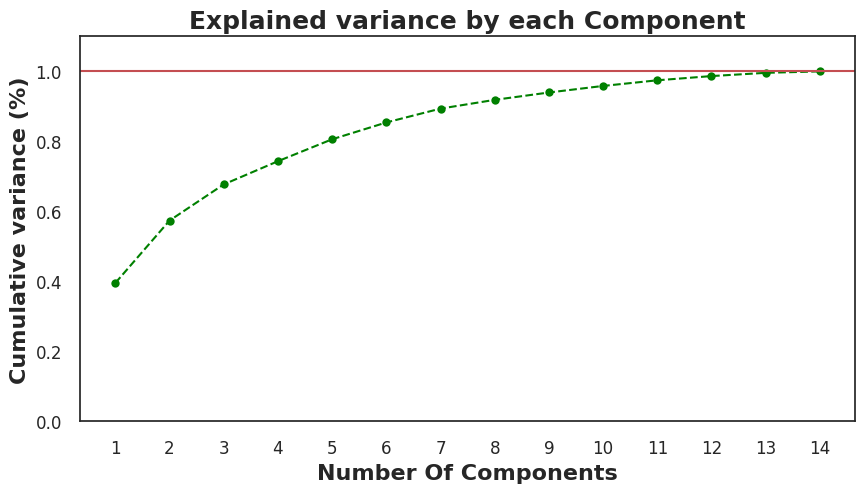

In [33]:
pca_var = PCA()
pca_var.fit(std_wine)

plt.figure(figsize=(10,5))
x1 = np.arange(1,1+std_wine.shape[1],step=1)
y1 = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(x1,y1,marker='o',linestyle='--',color='green')

plt.ylim(0.0,1.1)
plt.xlabel('Number Of Components', fontweight = 'bold',fontsize=16)
plt.xticks(np.arange(1,1+std_wine.shape[1],step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold',fontsize=16)
plt.title('Explained variance by each Component',fontweight='bold',fontsize=18)
plt.axhline(y=1,color='r',linestyle='-')
plt.gca().xaxis.grid(False)

In [34]:
var = pca_var.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

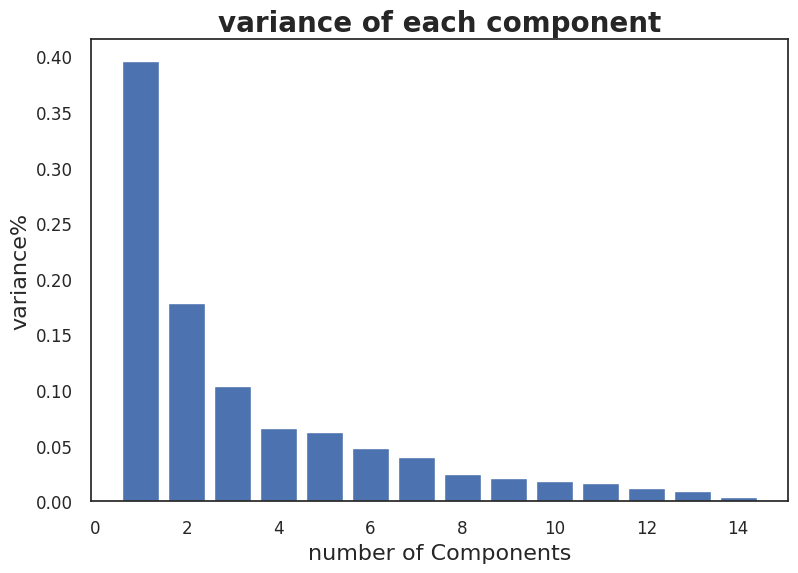

In [35]:
plt.bar(range(1,len(var)+1),var)
plt.xlabel('number of Components',fontsize=16)
plt.ylabel('variance%',fontsize=16)
plt.title("variance of each component",fontweight="bold",fontsize=20)
plt.show()

In [36]:
var_1 = np.cumsum(np.round(var,decimals=4)*100)
var_1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [38]:
pca = PCA(n_components =3)
pca_std=pca.fit_transform(std_wine)

In [39]:
pca_std_wine = pd.DataFrame(data=pca_std,columns=['PC1','PC2','PC3'])

In [40]:
print(pca_std_wine.shape)
pca_std_wine.head()

(178, 3)


,PC1,PC2,PC3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829


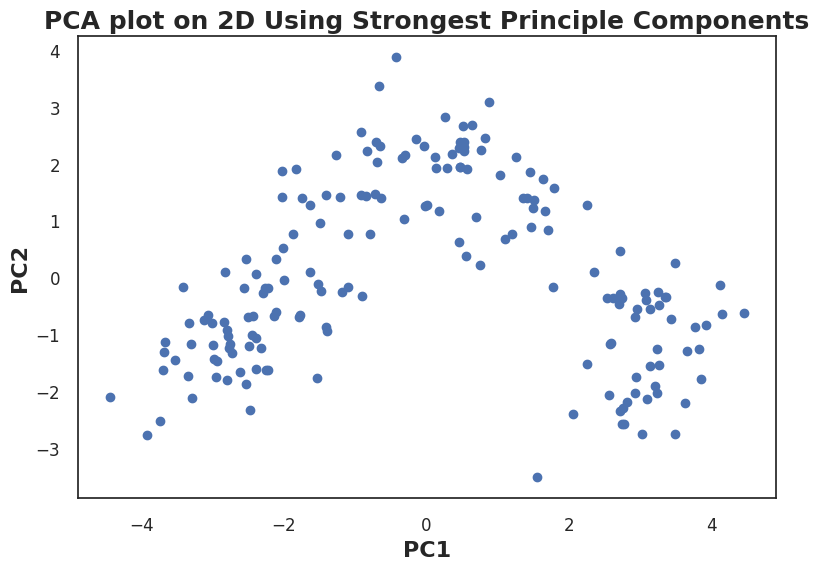

In [42]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0],pca_std_wine.iloc[:,1])
plt.title('PCA plot on 2D Using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold',fontsize=16)
plt.ylabel('PC2',fontweight='bold',fontsize=16)
plt.show()

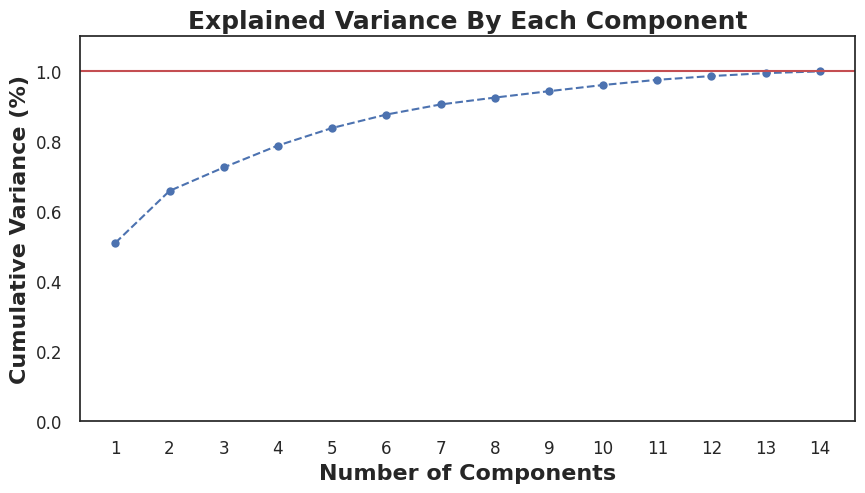

In [45]:
pca_var = PCA()
pca_var.fit(norm_wine)

#plot
plt.figure(figsize=(10,5))
xi = np.arange(1,1+norm_wine.shape[1],step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi,yi,marker='o',linestyle='--',color='b')

#Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold',fontsize=16)
plt.xticks(np.arange(1, 1+norm_wine.shape[1],step=1))
plt.ylabel('Cumulative Variance (%)',fontweight ='bold',fontsize=16)
plt.title('Explained Variance By Each Component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r',linestyle='-')
plt.gca().xaxis.grid(False)

In [47]:
var = pca_var.explained_variance_ratio_
var

array([0.51003634, 0.14853339, 0.06702619, 0.06257153, 0.05009893,
       0.03837954, 0.02882988, 0.01963591, 0.01828022, 0.01769633,
       0.01483498, 0.01075837, 0.00837412, 0.00494429])

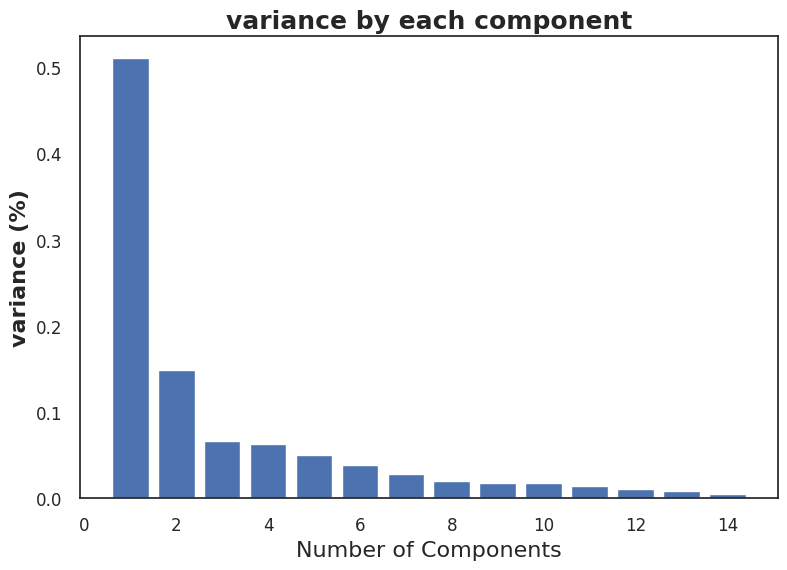

In [48]:
plt.bar(range(1,len(var)+1),var)
plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('variance (%)',fontweight='bold',fontsize=16)
plt.title('variance by each component', fontweight = 'bold',fontsize=18)
plt.show()

In [49]:
#Cummative Variance
var_1 = np.cumsum(np.round(var,decimals=4)*100)
var_1

array([51.  , 65.85, 72.55, 78.81, 83.82, 87.66, 90.54, 92.5 , 94.33,
       96.1 , 97.58, 98.66, 99.5 , 99.99])

In [50]:
pca = PCA(n_components = 3)
pca_norm = pca.fit_transform(norm_wine)
pca_norm_wine = pd.DataFrame(data=pca_norm, columns=['PC1','PC2','PC3'])
print(pca_norm_wine.shape)
pca_norm_wine.head()

(178, 3)


,PC1,PC2,PC3
0,-0.847604,-0.243146,0.029752
1,-0.678651,-0.005712,-0.283970
2,-0.700372,-0.183868,0.197457
3,-0.936076,-0.566967,0.093919
4,-0.454077,-0.063348,0.286092


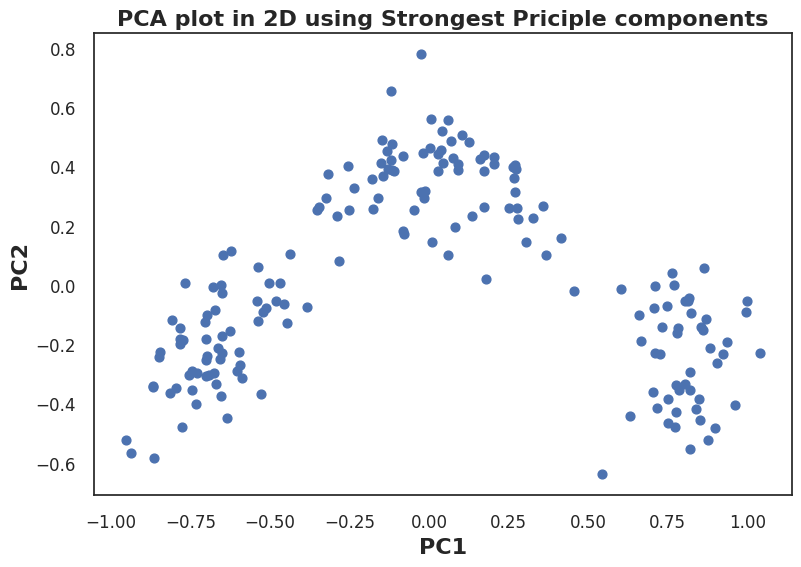

In [51]:
#PCA Plot in 2D

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1],s=40)

plt.title('PCA plot in 2D using Strongest Priciple components',fontweight='bold',fontsize=16)
plt.xlabel('PC1',fontweight='bold',fontsize=16)
plt.ylabel('PC2',fontweight='bold',fontsize=16)
plt.show()

## **K-Means Clustering**


Elbow Method for Determining Cluster Amount on PCA Standard Scaled Dataset

In [53]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=15, max_iter = 500, random_state=17)
    kmeans.fit(pca_std_wine)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 10.45it/s]


In [54]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=15, max_iter = 500, random_state=17)
    kmeans.fit(pca_std_wine)
    silhouette[i] = sil(pca_std_wine, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 10.58it/s]


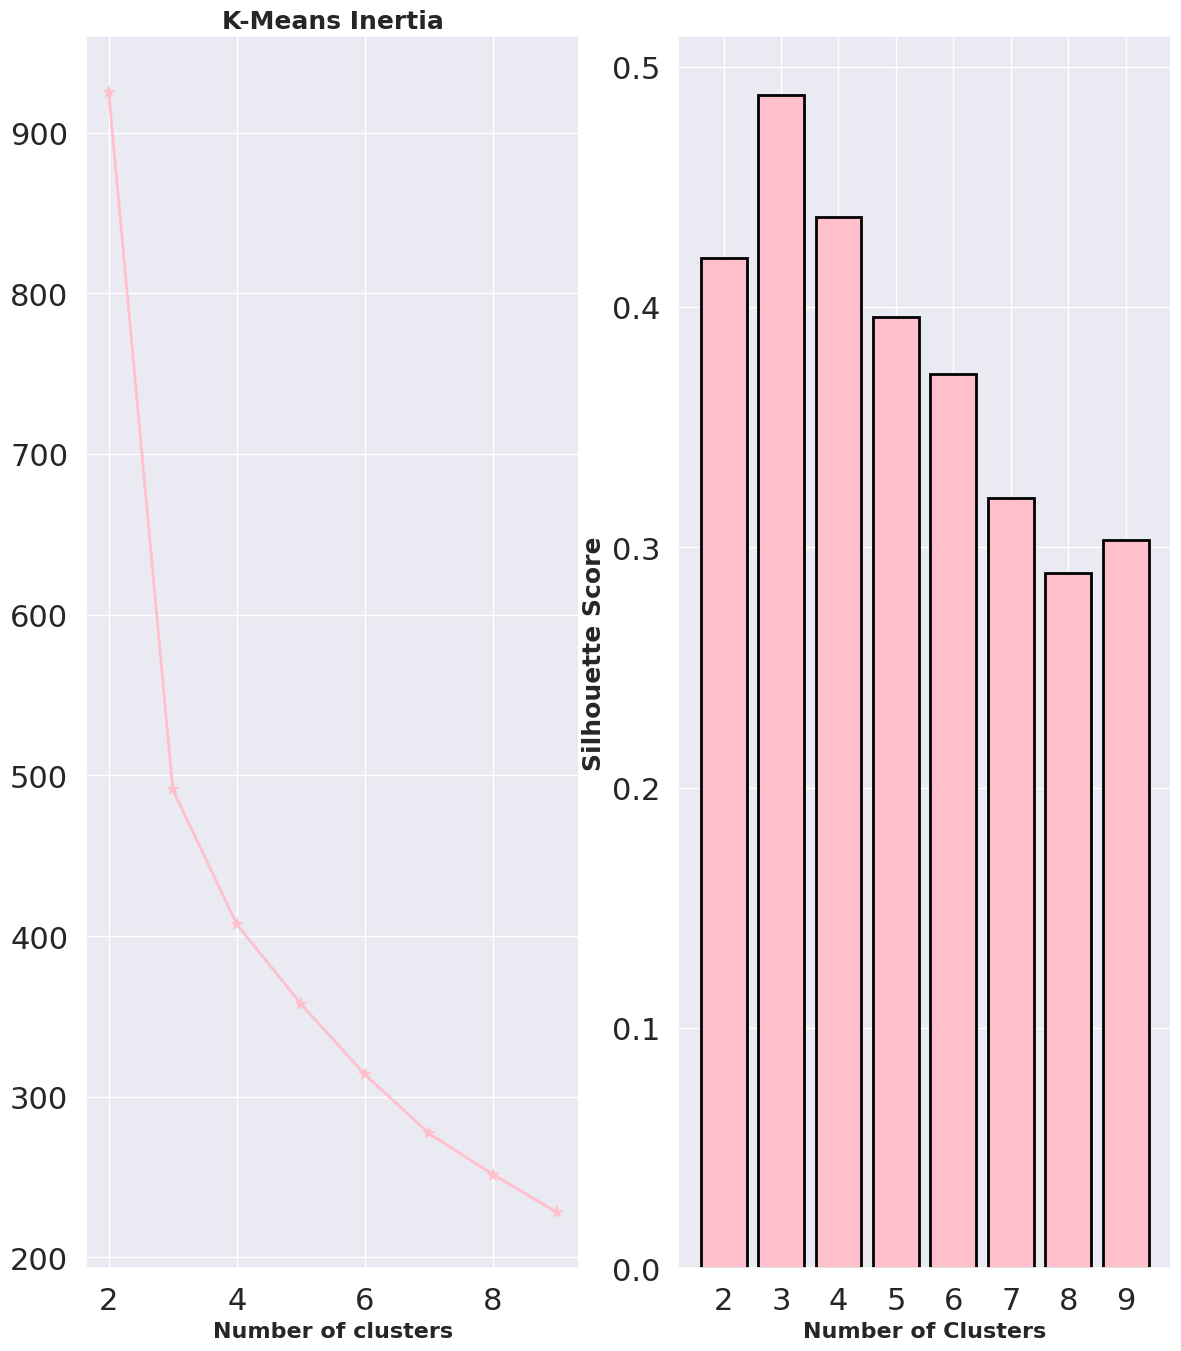

In [58]:
sns.set(style='darkgrid', rc={'figure.figsize':(14,16)},font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker ="*", lw = 2 ,color='pink',ms=10)
plt.xlabel("Number of clusters",fontweight='bold',fontsize=16)
plt.title("K-Means Inertia", fontweight='bold',fontsize=18)

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)),list(silhouette.values()),align='center', edgecolor='black',lw=2, color='pink')
plt.xticks(range(len(silhouette)),list(silhouette.keys()))
plt.xlabel("Number of Clusters",fontweight='bold',fontsize=16)
plt.ylabel('Silhouette Score',fontweight='bold',fontsize=18)
plt.show()

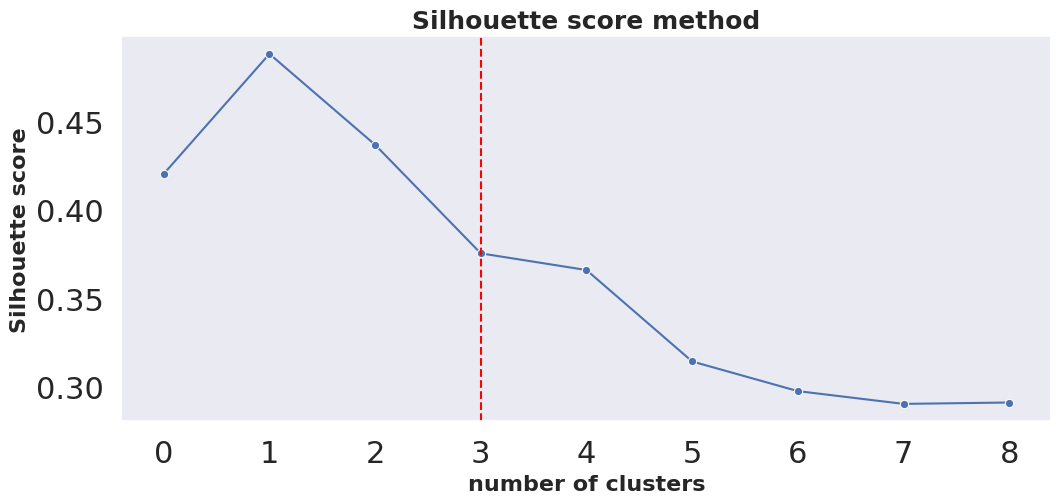

In [62]:
#Silhouette Score
from sklearn.metrics  import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] #No: of Clusters
clusters_inertia = [] #Inertia of Clusters
s_scores = [] #Silhouette Scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_std_wine)
    clusters_inertia.append(KM_est.inertia_) #Data For Elbow Method
    silhouette_avg = silhouette_score(pca_std_wine, KM_est.labels_)
    s_scores.append(silhouette_avg) #data for the silhouette Score Method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method",fontweight='bold', fontsize=18)
ax.set_xlabel("number of clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

In [63]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_wine)
    sil_score1 = sil(pca_std_wine, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4204121880714805
For n_clusters = 3 The average silhouette_score is : 0.4881750664935788
For n_clusters = 4 The average silhouette_score is : 0.4373730550531827
For n_clusters = 5 The average silhouette_score is : 0.3744959543005819
For n_clusters = 6 The average silhouette_score is : 0.3801278026161835
For n_clusters = 7 The average silhouette_score is : 0.33136197672609813
For n_clusters = 8 The average silhouette_score is : 0.29709396480883515
For n_clusters = 9 The average silhouette_score is : 0.2956382686833664


In [64]:
#KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_wine)
y_predict_kmeans.shape

(178,)

In [65]:
y_predict_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [66]:
model_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [67]:
model_kmeans.cluster_centers_

array([[-2.54885890e+00, -9.36610484e-01,  1.63163246e-03],
       [ 1.21711421e-01,  1.75036892e+00,  1.28333665e-01],
       [ 3.05866503e+00, -1.20826261e+00, -1.77541159e-01]])

In [68]:
model_kmeans.inertia_

491.23057091626697

In [69]:
#Assign cluster to the data
wine_data['Kmeans_Label']=model_kmeans.labels_

In [70]:
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
ID,,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
175,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
176,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2


In [71]:
wine_df=wine_data.groupby('Kmeans_Label').agg(['mean'])

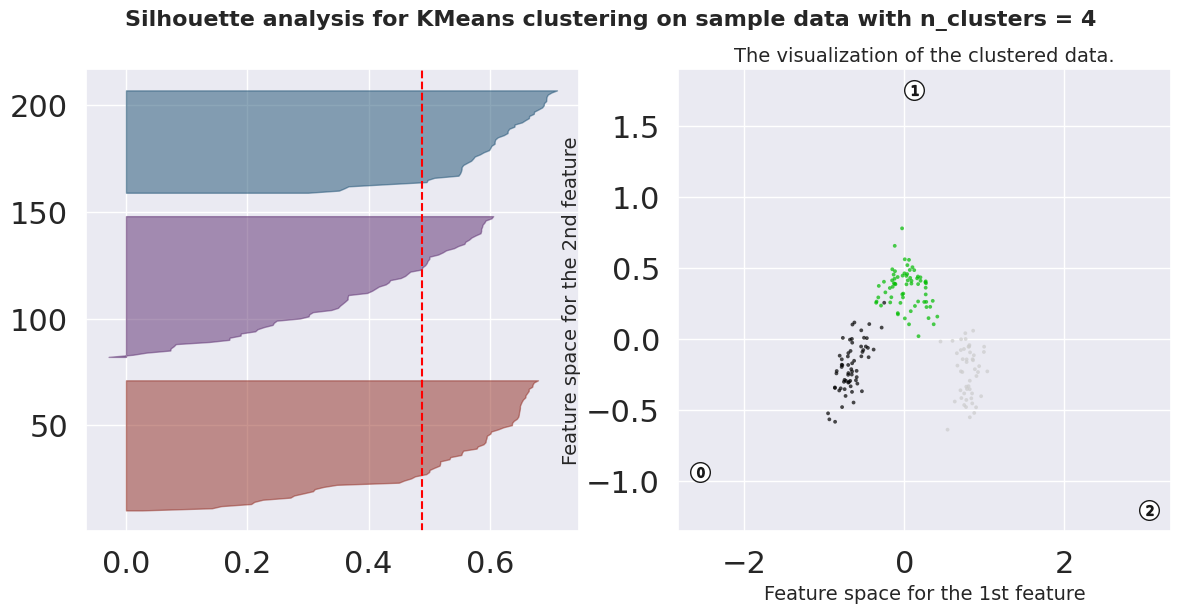

In [72]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_wine)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 3 is number of clusters
ax2.scatter(pca_norm_wine.iloc[:, 0],pca_norm_wine.iloc[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=colors1,edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4), fontsize=16, fontweight='bold')
#sil_visualizer1.show()
plt.show()

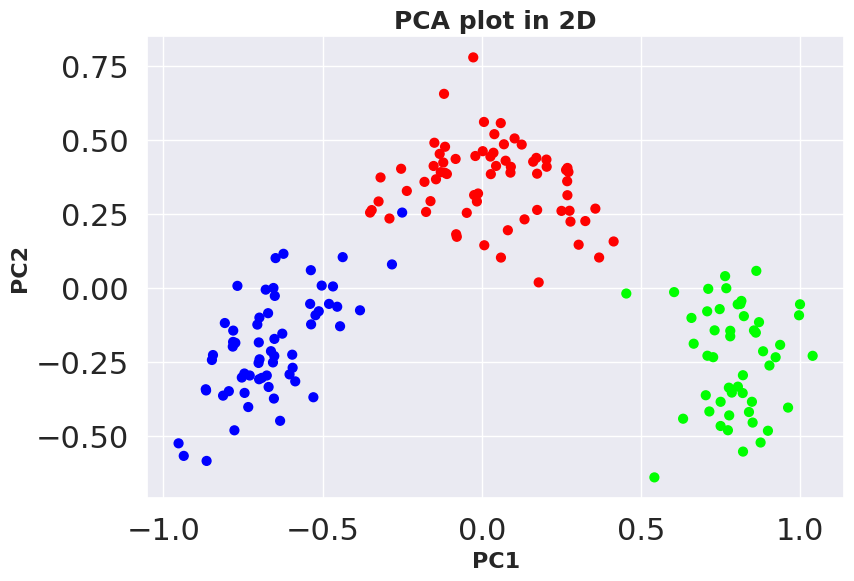

In [73]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_data['Kmeans_Label'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

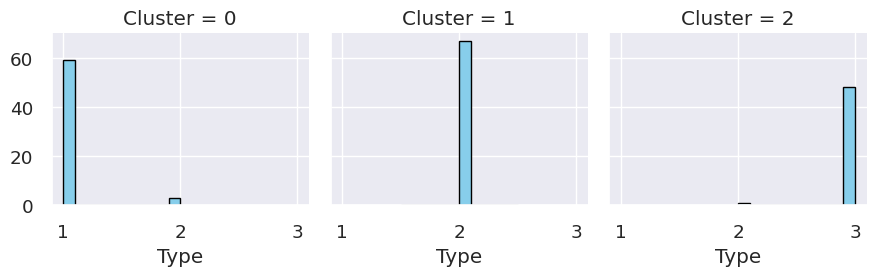

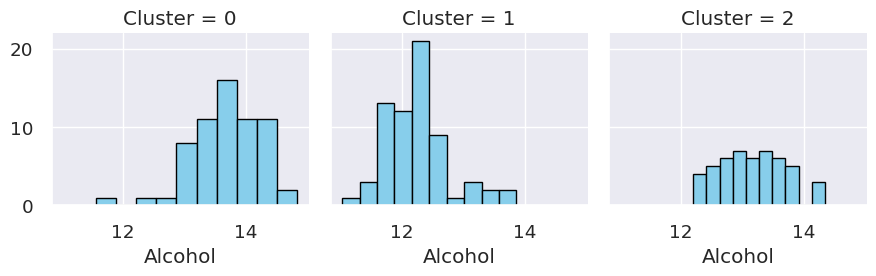

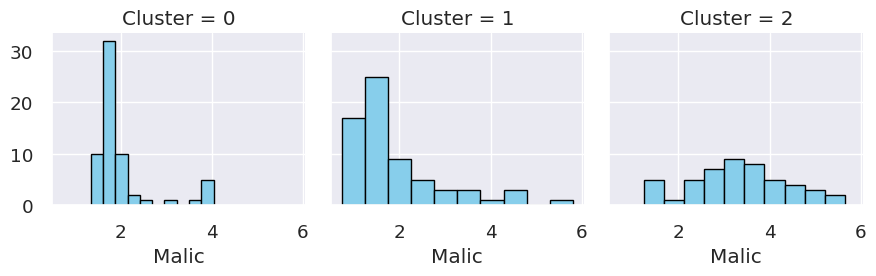

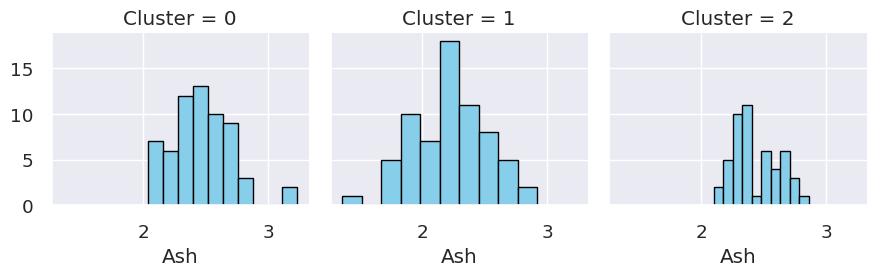

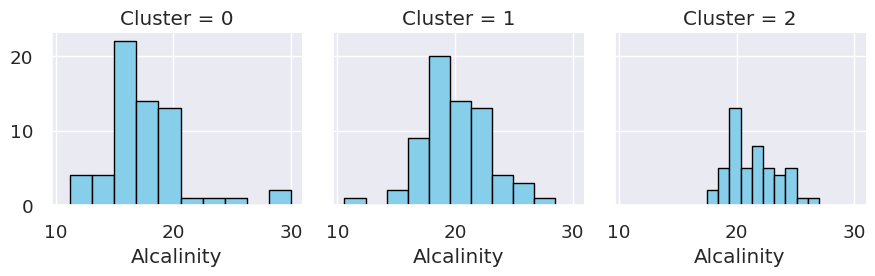

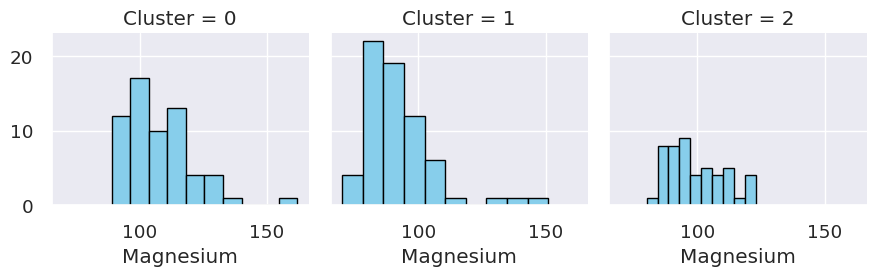

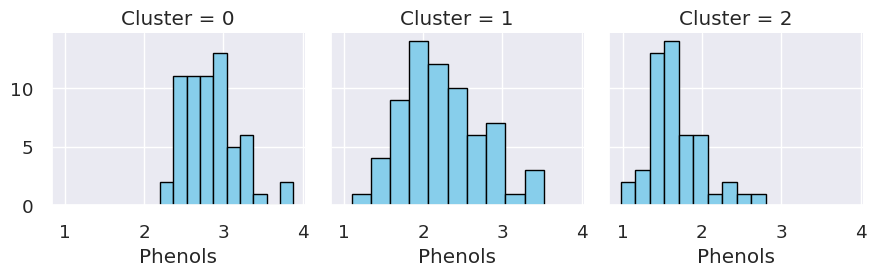

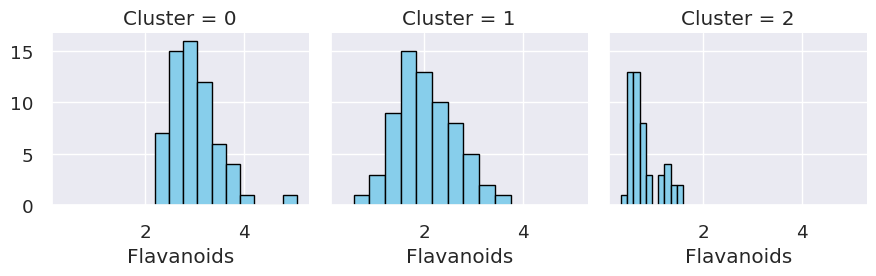

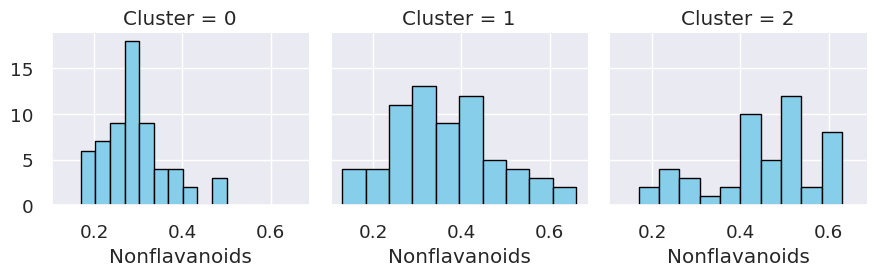

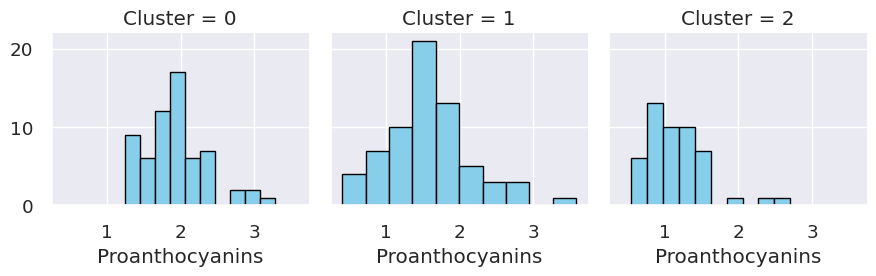

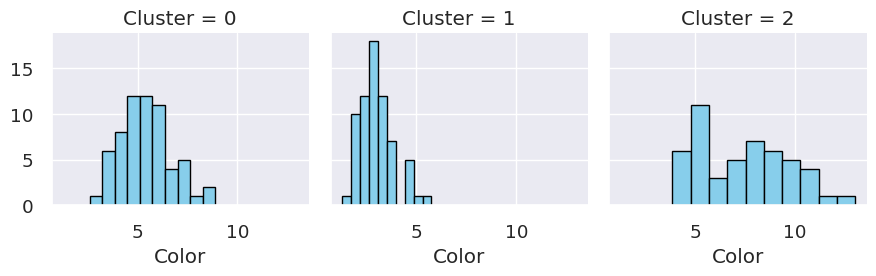

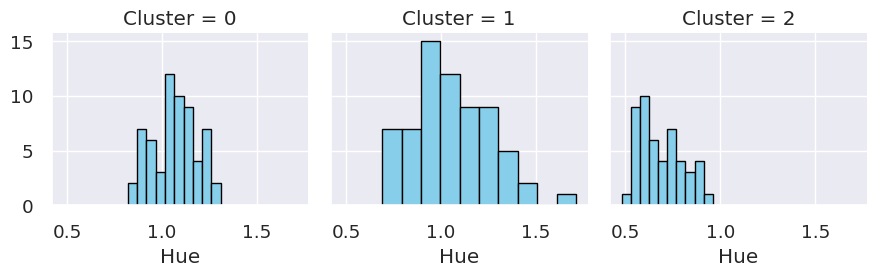

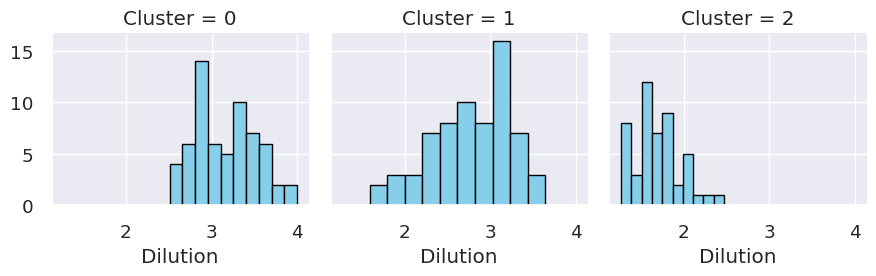

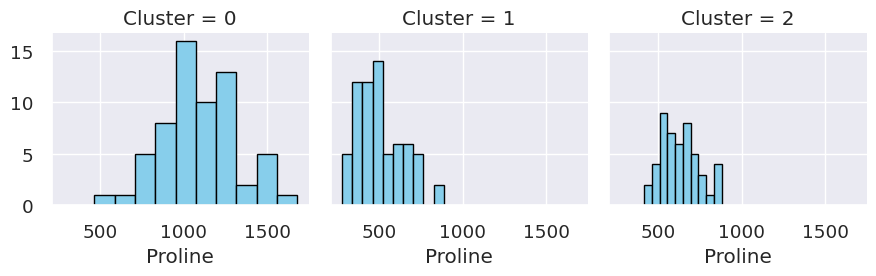

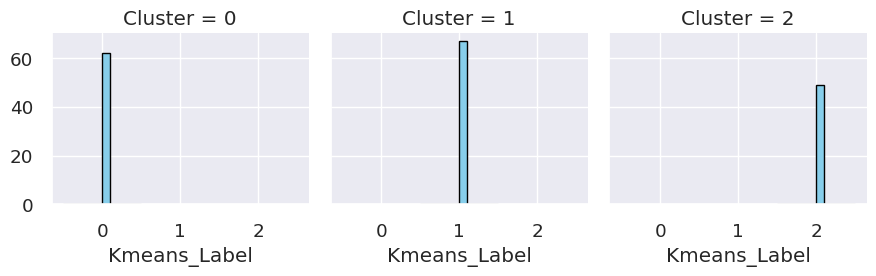

In [74]:
wine_df1 = wine_data.copy()
wine_df1['Cluster'] = model_kmeans.labels_

aux = wine_df1.columns.tolist()
aux[0:len(aux)-1]
sns.set(style="darkgrid", rc={'figure.figsize':(15,10)}, font_scale=1.2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(wine_df1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [75]:
cluster1 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==1].mean(),columns= ['Cluster2_Avg'])
cluster3 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==2].mean(),columns= ['Cluster2_Avg'])
avg_wine = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_wine

,Cluster1_Avg,Cluster2_Avg,Cluster2_Avg
Type,1.048387,2.000000,2.979592
Alcohol,13.676774,12.264478,13.151633
Malic,1.997903,1.912239,3.344490
Ash,2.466290,2.224328,2.434694
Alcalinity,17.462903,19.953731,21.438776
Magnesium,107.967742,92.656716,99.020408
Phenols,2.847581,2.235075,1.678163
Flavanoids,3.003226,2.028507,0.797959
Nonflavanoids,0.292097,0.361343,0.450816
Proanthocyanins,1.922097,1.597313,1.163061


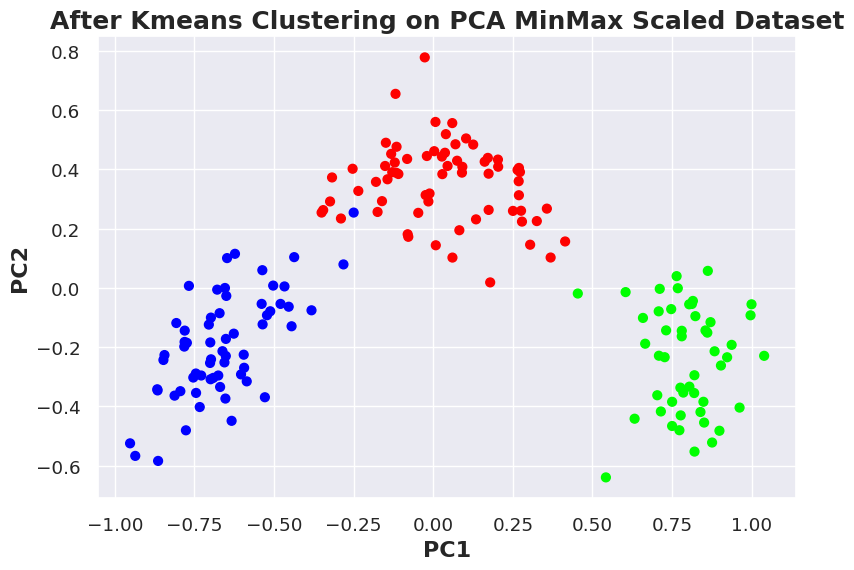

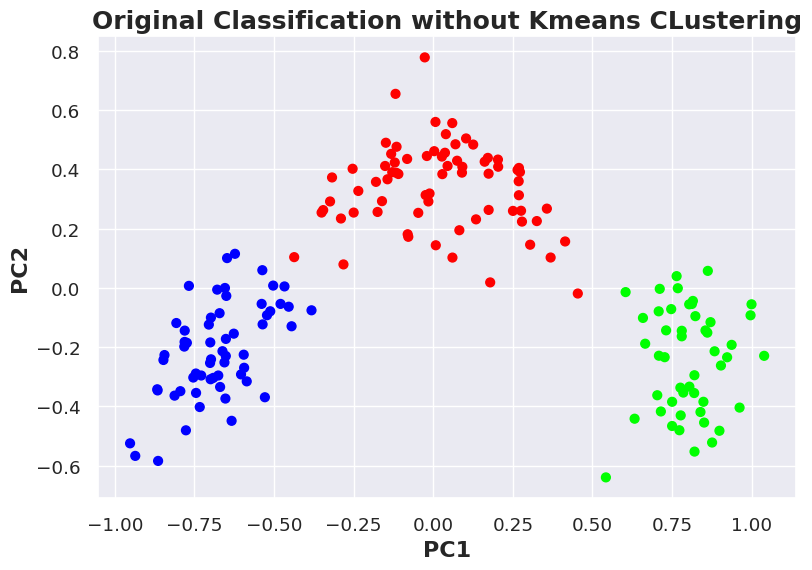

In [76]:
#Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_data['Kmeans_Label'], cmap="brg", s=40)
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_data['Type'], cmap="brg", s=40)
plt.title('Original Classification without Kmeans CLustering',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

In [77]:
display('After Applying PCA and Kmens CLustering on Dataset',wine_df.groupby('Kmeans_Label').agg(['mean']),'Original Classified Dataset',wine_data.groupby('ID').agg(['mean']))

'After Applying PCA and Kmens CLustering on Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,2.000000,12.264478,1.912239,2.224328,19.953731,92.656716,2.235075,2.028507,0.361343,1.597313,3.020896,1.056060,2.775075,507.208955
2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,,,
1,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
2,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
3,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
4,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
5,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
175,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0


### **T-Sne**

In [78]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(norm_wine)

tsne_df = pd.DataFrame(data = X_tsne, columns = ['t-SNE Comp. 1', 't-SNE Comp. 2'])

print(tsne_df.shape)
tsne_df.head()

(178, 2)


,t-SNE Comp. 1,t-SNE Comp. 2
0,-18.862610,-3.924402
1,-15.075314,-2.165099
2,-18.463531,-0.631080
3,-20.723375,-1.195494
4,-15.213067,1.281198


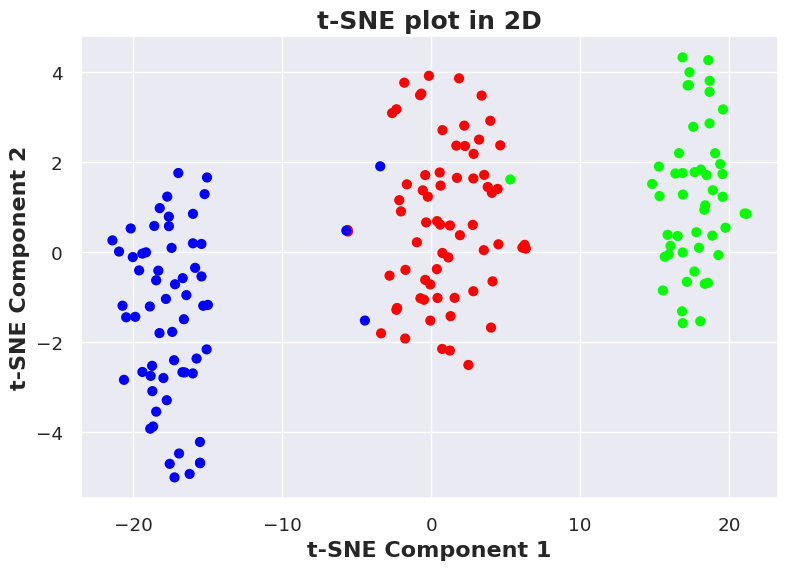

In [79]:
#t-SNE plot in 2D
plt.figure(figsize=(9,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c= wine_data['Kmeans_Label'], cmap="brg", s=40)

plt.title('t-SNE plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('t-SNE Component 1', fontweight='bold', fontsize=16)
plt.ylabel('t-SNE Component 2', fontweight='bold', fontsize=16)
plt.show()

### **Hierarchical Clustering Algorithm**

Dendrogram On PCA MinMaxScaler Applied Dataset

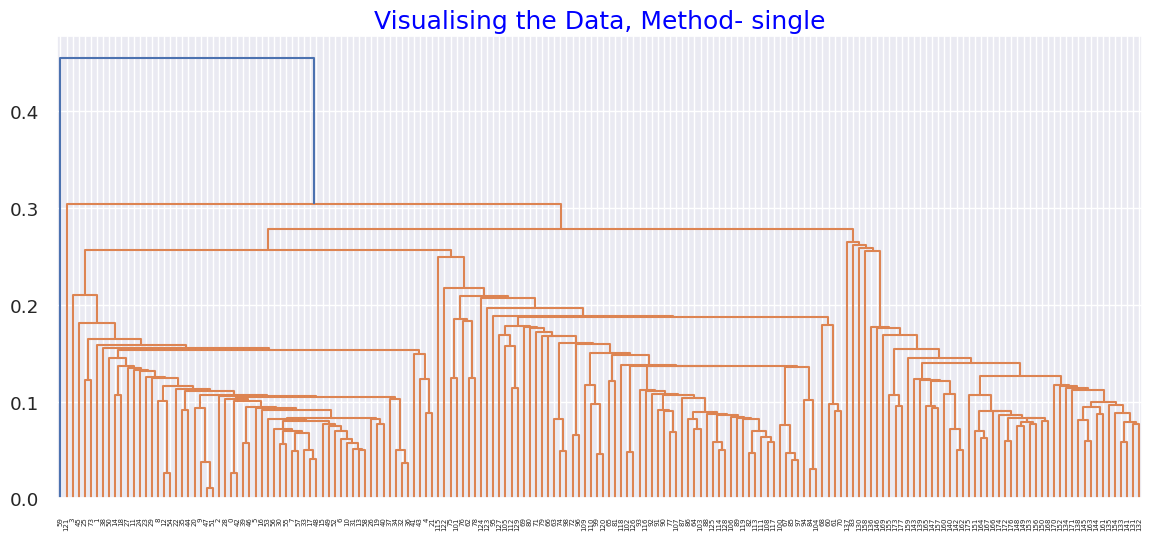

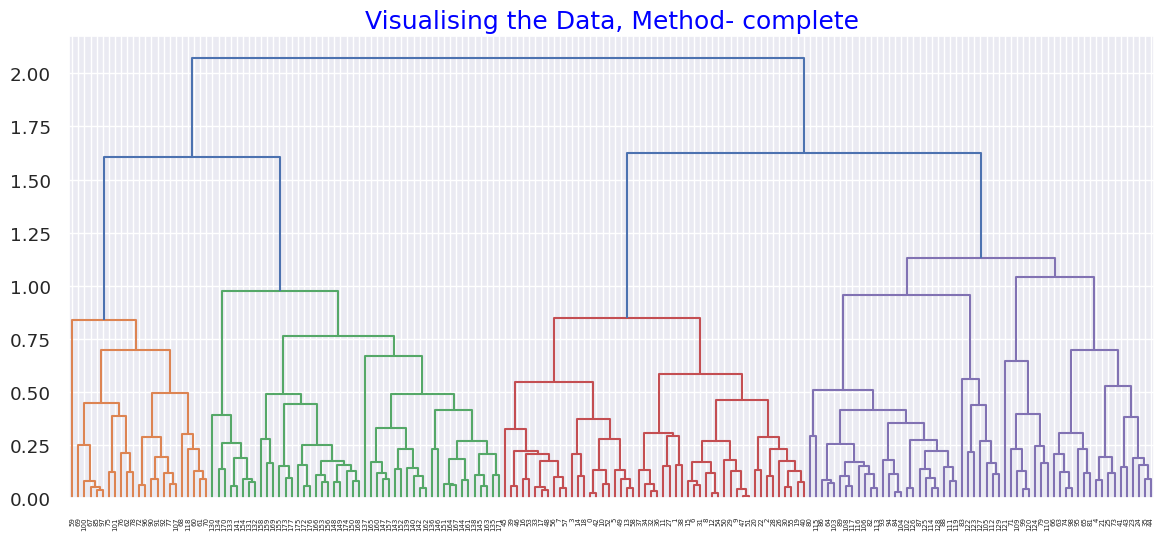

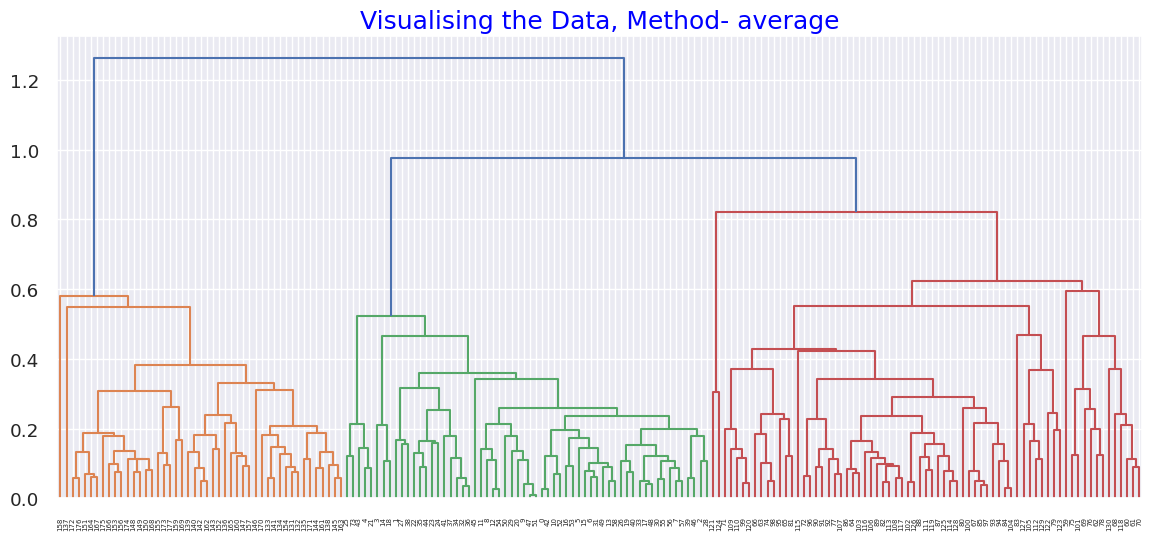

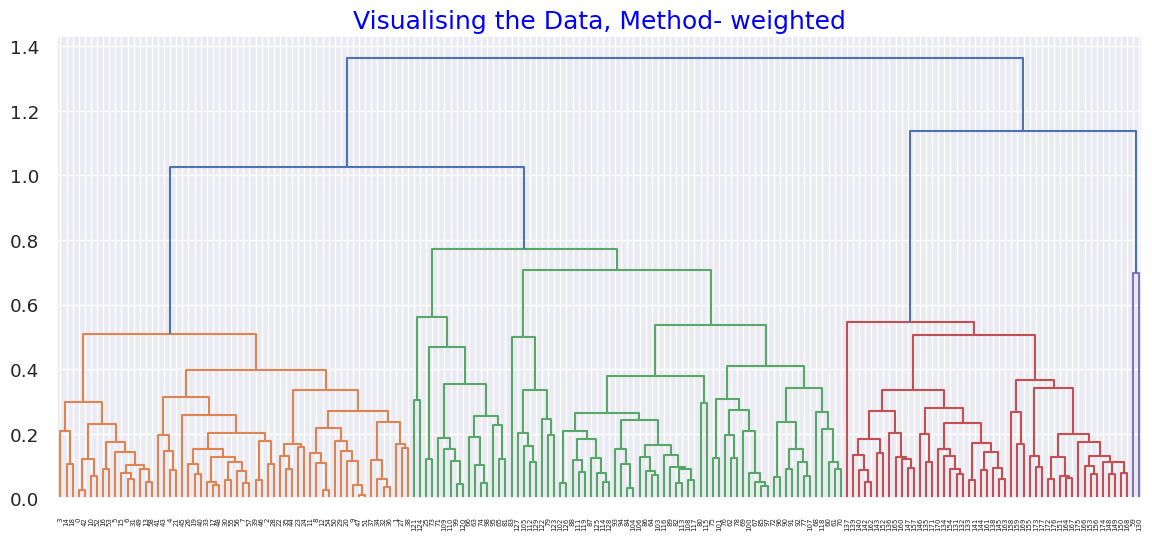

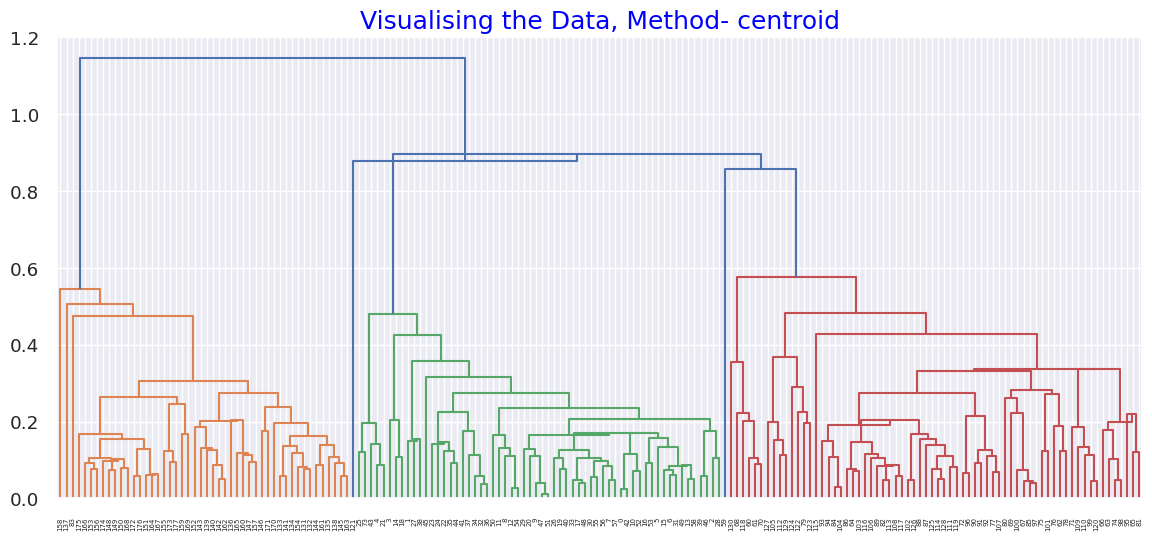

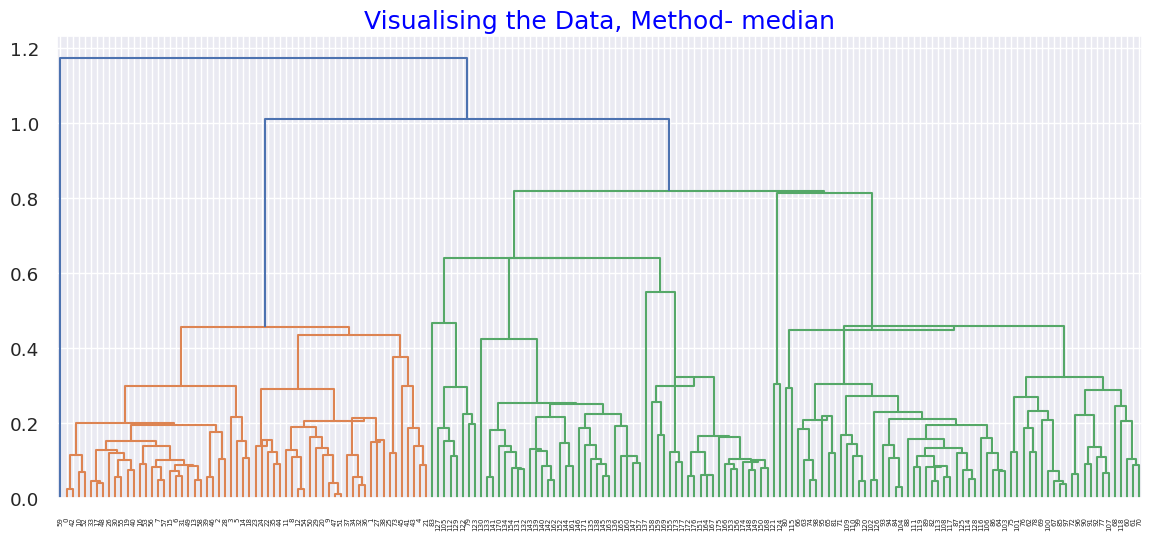

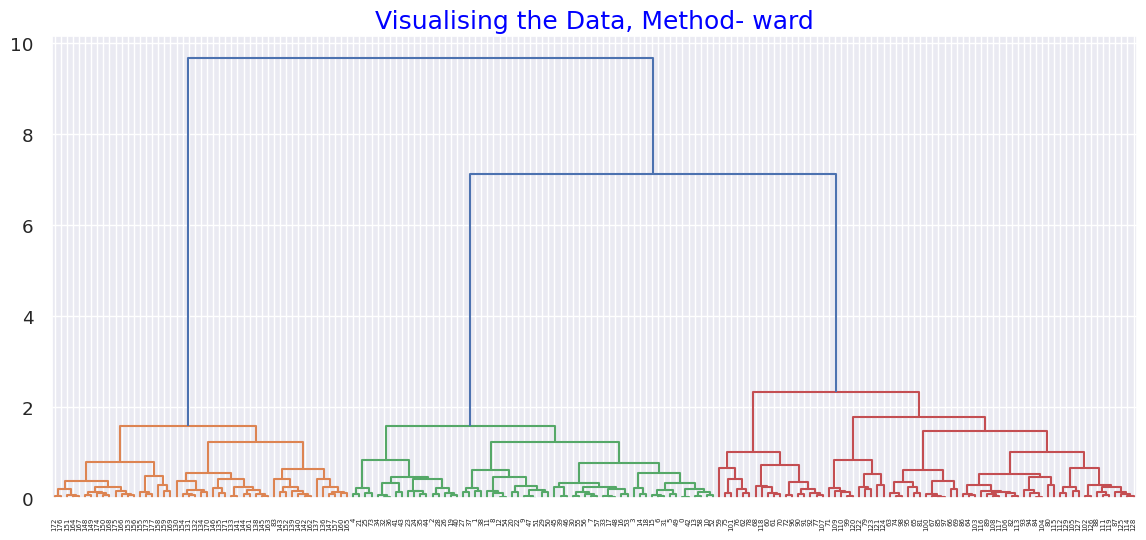

In [80]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6)) 
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}  
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_norm_wine, method = methods,optimal_ordering=False))

In [81]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_norm_wine)
        silhouette_score1 = sil(pca_norm_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5028007154238561
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- single : 0.19568972974344642

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5742903318722894
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4090582228264682
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5673677512398142
For n_clusters = 3 The average silhouette_score with linkage- single : 0.06455702366101267

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4799467565432556
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.42050509534084873
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5202861583932623
Fo

In [82]:
#Applying Different Linkages using Different Distance Methods
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_norm_wine)
            silhouette_score1 = sil(pca_norm_wine, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.4706570947689274
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.4706570947689274
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.433789043468496

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.5003007606254242
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.50030076

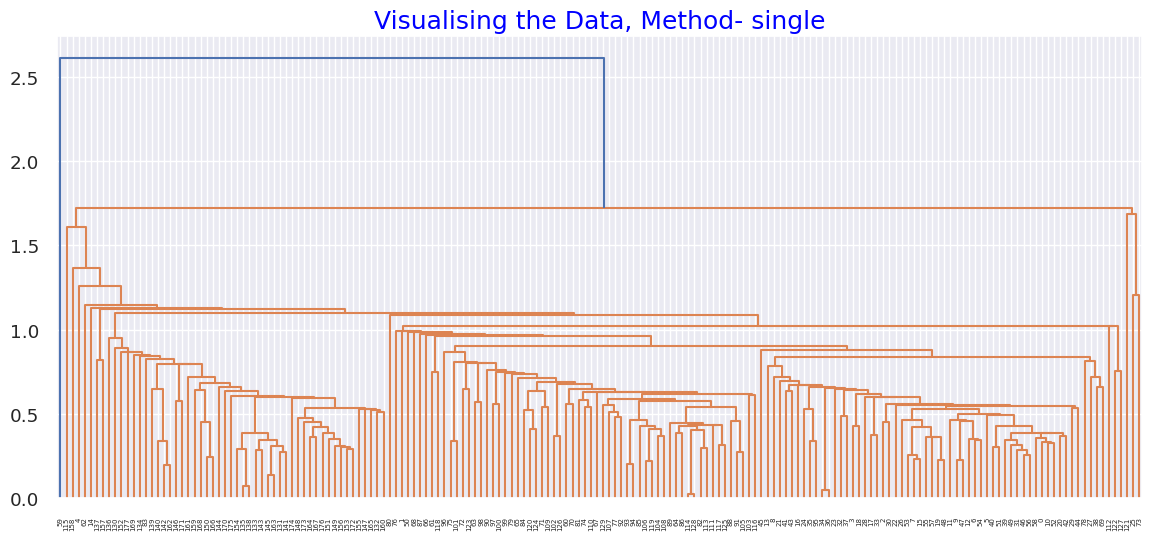

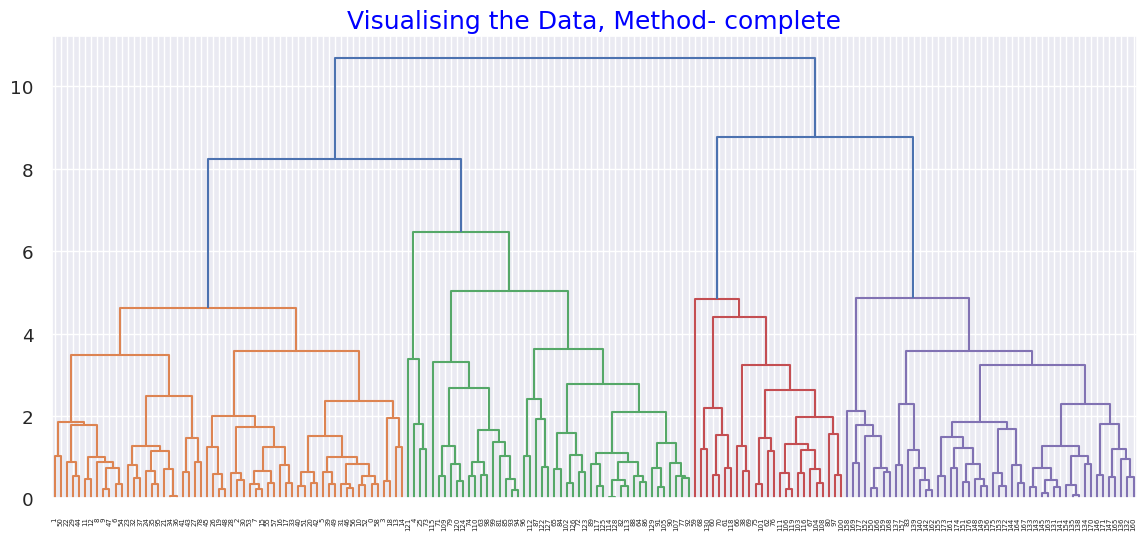

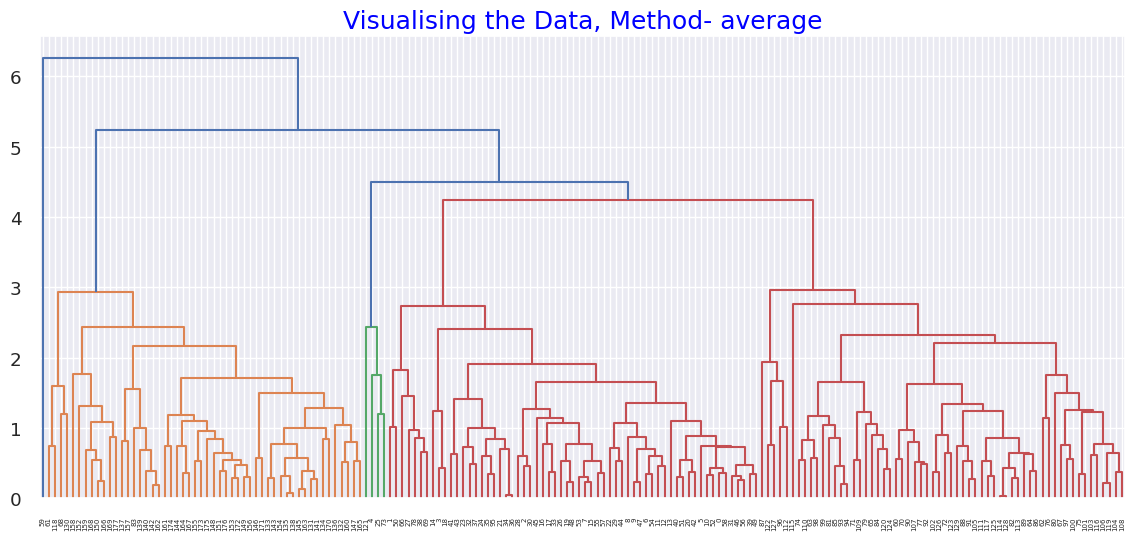

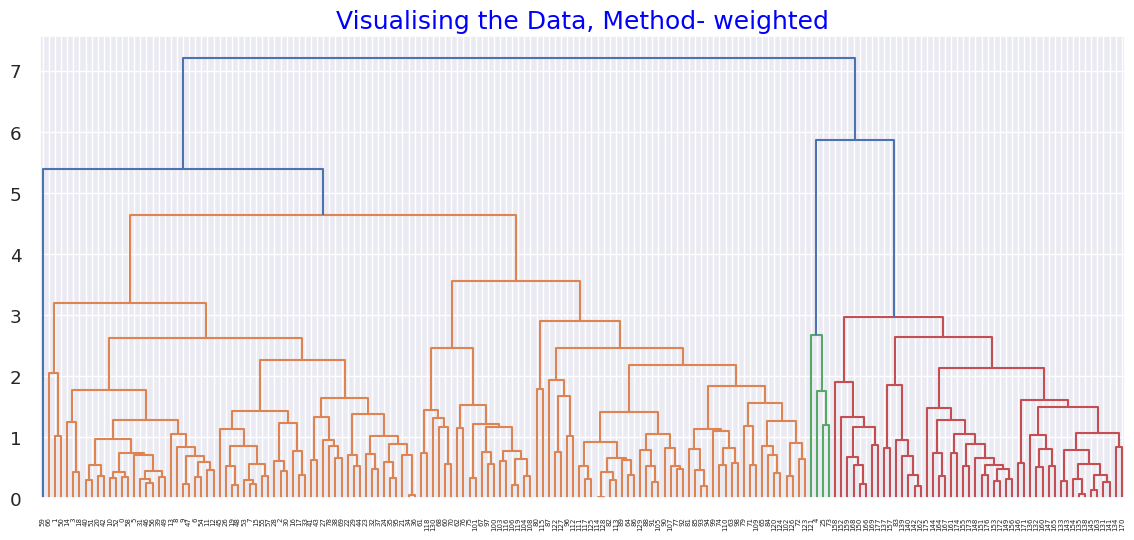

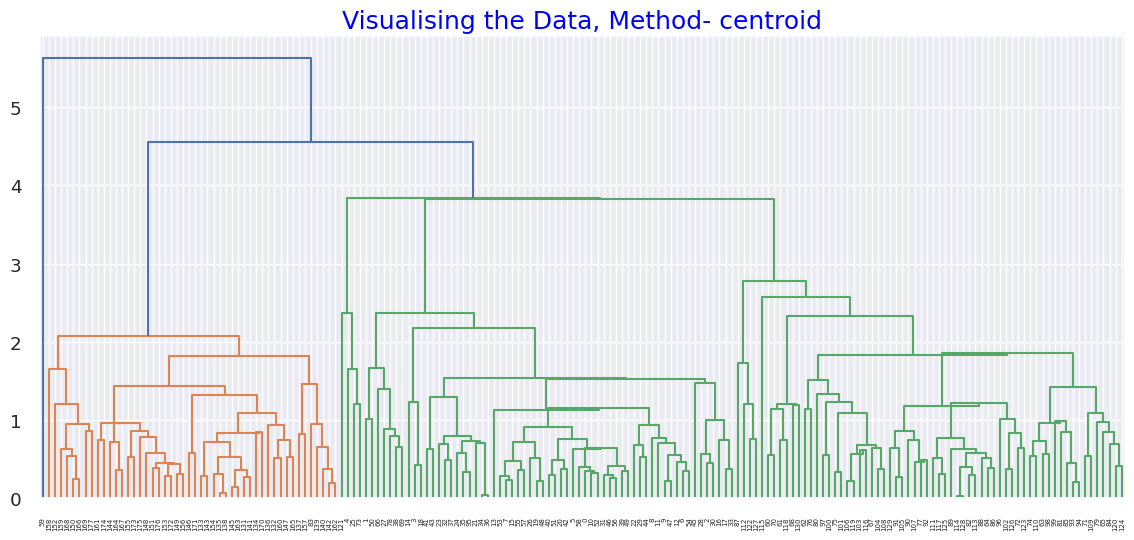

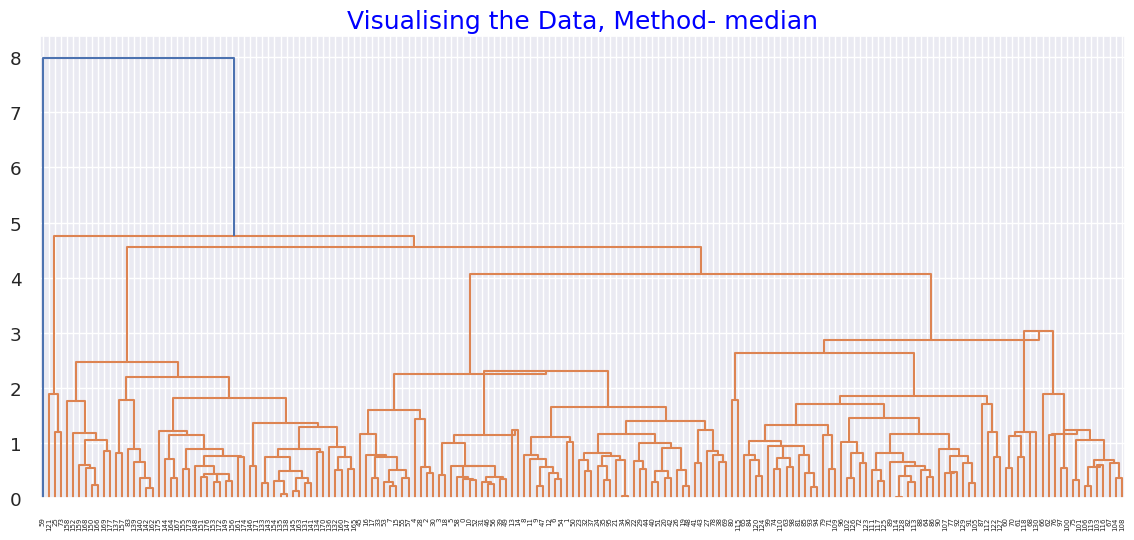

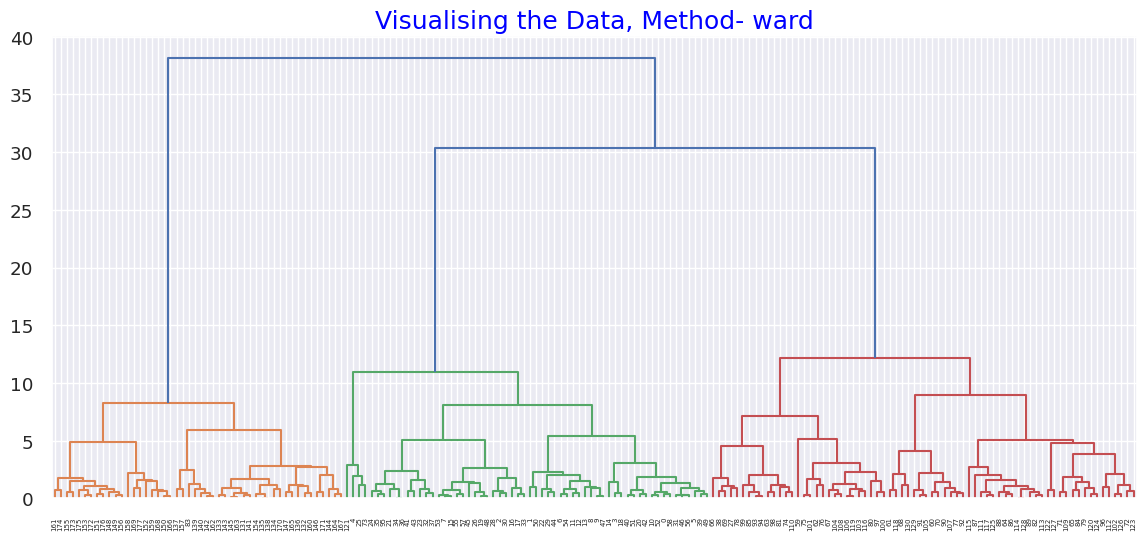

In [83]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))  
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'} 
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_wine, method = methods,optimal_ordering=False))

In [84]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_wine)
        silhouette_score1 = sil(pca_std_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-", linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4299144493427621
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.32862502168367774
For n_clusters = 2 The average silhouette_score with linkage- average : 0.3427938744119085
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3427938744119085

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4788240730180451
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.2997106053801541
For n_clusters = 3 The average silhouette_score with linkage- average : 0.41176259538403825
For n_clusters = 3 The average silhouette_score with linkage- single : 0.19025260881091394

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.41419762385707337
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4225190812930178
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3274648531010522
F

In [85]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages)
            hie_labels2 = hie_cluster2.fit_predict(pca_std_wine)
            silhouette_score2 = sil(pca_std_wine, hie_labels2)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score2)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.32862502168367774
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.08410132448065451
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.32862502168367774
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.08410132448065451
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4328115040557741

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.3427938744119085
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.3427938744119085
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.3427938744119085
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.342

In [86]:
#Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0,
       3, 3, 3, 2, 3, 0, 0, 0, 0, 3, 3, 3, 2, 0, 3, 0, 0, 1, 0, 3, 0, 0,
       0, 0, 3, 0, 3, 3, 3, 2, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [87]:
agg_clustering.n_clusters_

4

In [88]:
(sil(pca_std_wine, agg_clustering.labels_)*100).round(3)

42.087

In [89]:
wine_data['Hierarchical_Labels'] = agg_clustering.labels_
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
ID,,,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,2
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,2
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,2
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,2
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0


In [90]:
wine_data.groupby('Hierarchical_Labels').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,1.951220,12.218049,2.141220,2.452439,22.095122,94.926829,2.457561,2.372195,0.367073,1.753902,3.066585,1.048049,2.934634,522.731707,0.902439
1,2.979167,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,2.000000
2,1.050000,13.694333,1.961500,2.411500,16.830000,108.016667,2.806500,2.933167,0.284333,1.947667,5.452000,1.066500,3.136500,1111.116667,0.033333
3,2.034483,12.411724,1.650345,2.035172,17.996552,91.413793,2.022759,1.727931,0.359310,1.322759,3.164483,1.055724,2.580690,507.862069,1.034483


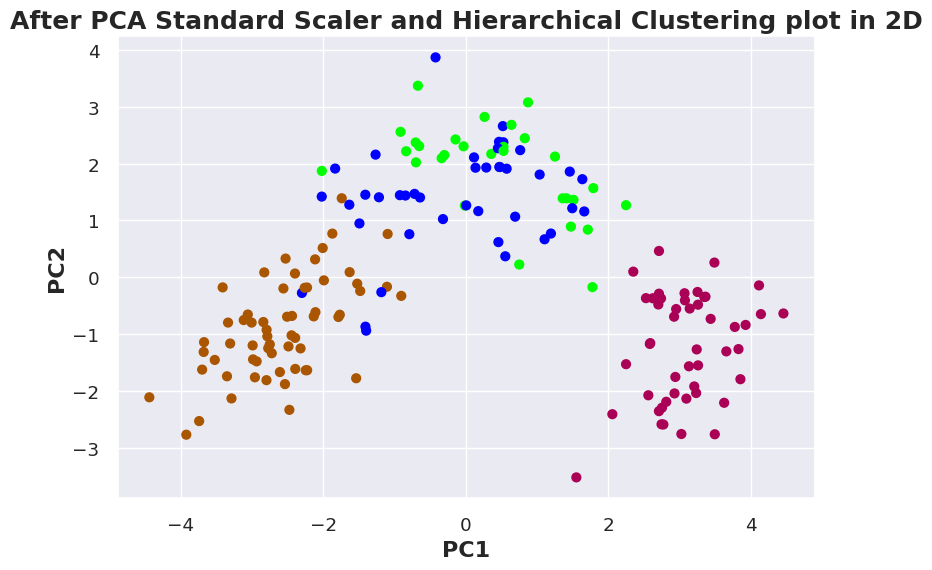

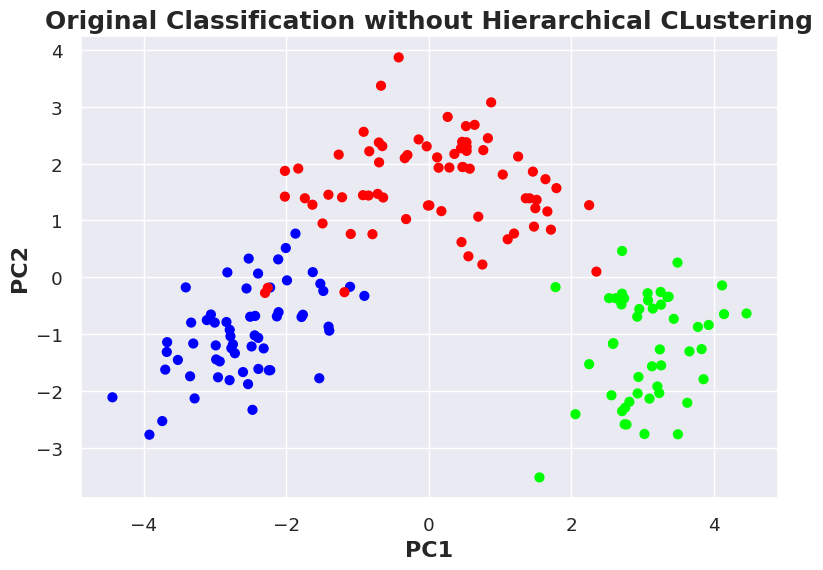

In [91]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_data['Hierarchical_Labels'], cmap="brg", s=40)
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_data['Type'], cmap="brg", s=40)
plt.title('Original Classification without Hierarchical CLustering', fontweight='bold', fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

In [92]:
display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',wine_data.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',wine_data.groupby('ID').agg(['mean']).head())

'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,1.951220,12.218049,2.141220,2.452439,22.095122,94.926829,2.457561,2.372195,0.367073,1.753902,3.066585,1.048049,2.934634,522.731707,0.902439
1,2.979167,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,2.000000
2,1.050000,13.694333,1.961500,2.411500,16.830000,108.016667,2.806500,2.933167,0.284333,1.947667,5.452000,1.066500,3.136500,1111.116667,0.033333
3,2.034483,12.411724,1.650345,2.035172,17.996552,91.413793,2.022759,1.727931,0.359310,1.322759,3.164483,1.055724,2.580690,507.862069,1.034483


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,,,,
1,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,2.0
2,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,2.0
3,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,2.0
4,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,2.0
5,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,0.0


In [93]:
#(Agglomerative Clustering) For PCA on MinMaxScaled Data
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_norm_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [94]:
agg_clustering.n_clusters_

3

In [95]:
(sil(pca_norm_wine, agg_clustering.labels_)*100).round(3)

56.737

In [96]:
wine_data['Hierarchical_Labels'] = agg_clustering.labels_
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,2.000000,12.264478,1.912239,2.224328,19.953731,92.656716,2.235075,2.028507,0.361343,1.597313,3.020896,1.056060,2.775075,507.208955
2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


In [97]:
wine_data.groupby('Hierarchical_Labels').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,2.014085,12.276901,1.928169,2.240845,20.069014,94.309859,2.233662,2.057746,0.363662,1.615915,3.097183,1.048535,2.754225,514.507042,1.0
1,3.000000,13.160000,3.375957,2.439574,21.489362,98.829787,1.682340,0.771489,0.452553,1.158085,7.466383,0.681064,1.691915,629.893617,2.0
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333,0.0


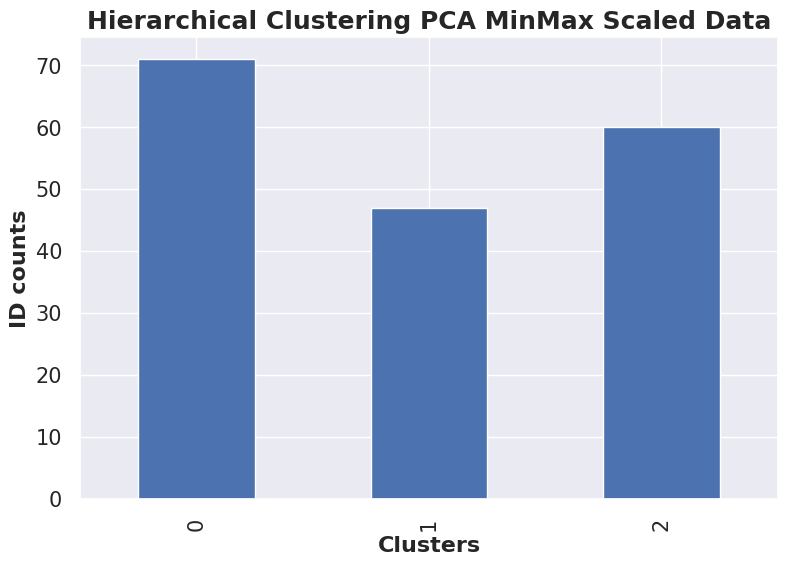

In [98]:
fig, ax = plt.subplots(figsize=(9, 6))
wine_data.groupby(['Hierarchical_Labels']).count()['Type'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data', fontweight='bold', fontsize=18)
ax.set_xlabel('Clusters', fontweight='bold', fontsize=16)
ax.set_ylabel('ID counts', fontweight='bold', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

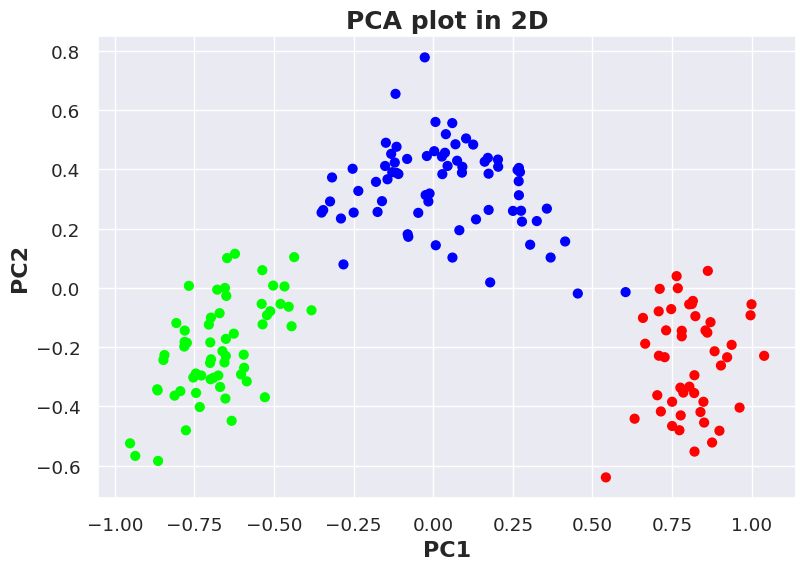

In [99]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_data['Hierarchical_Labels'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

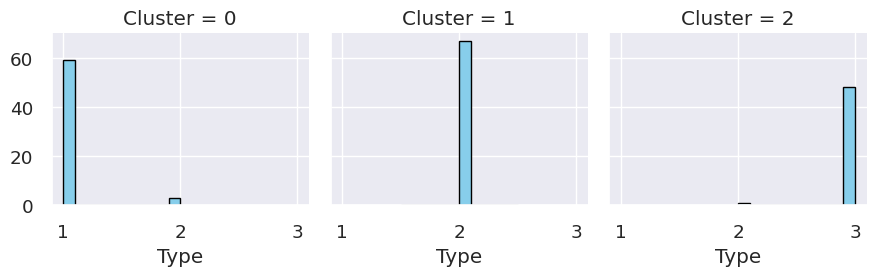

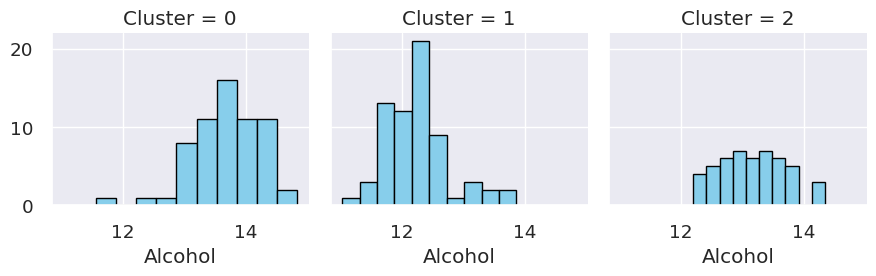

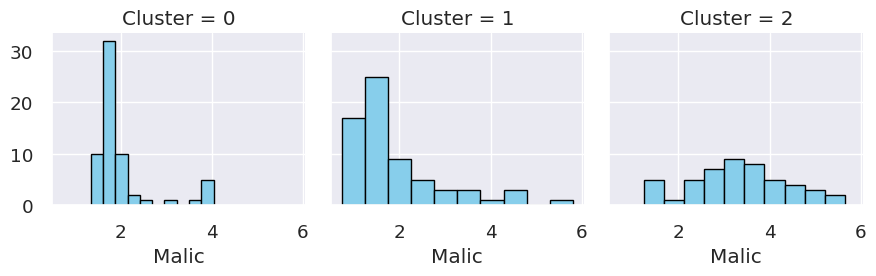

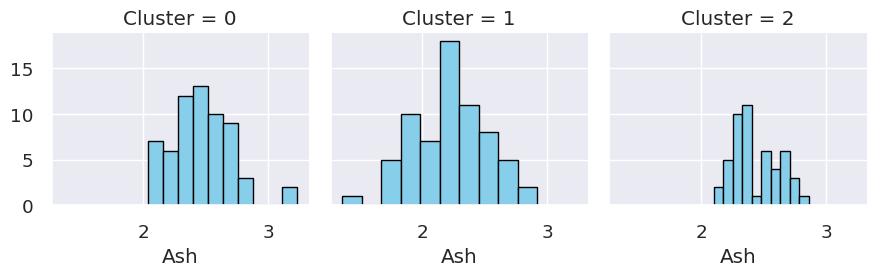

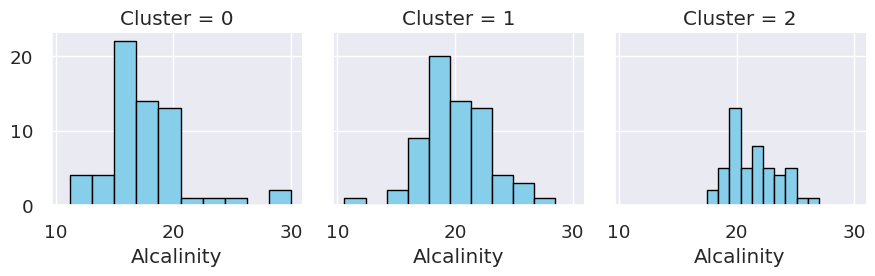

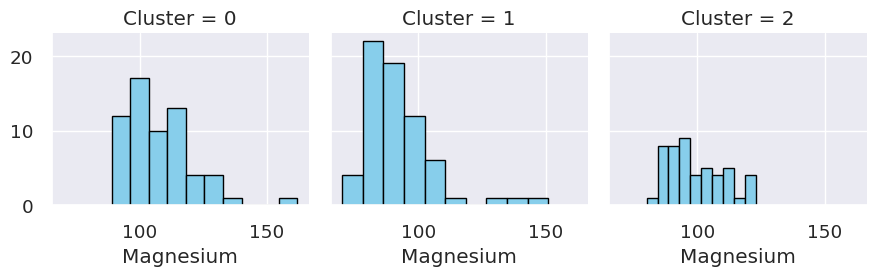

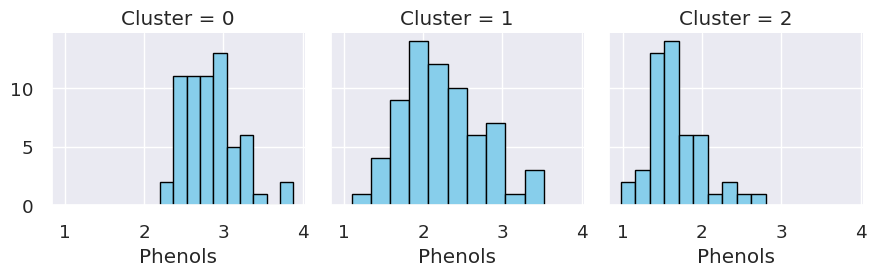

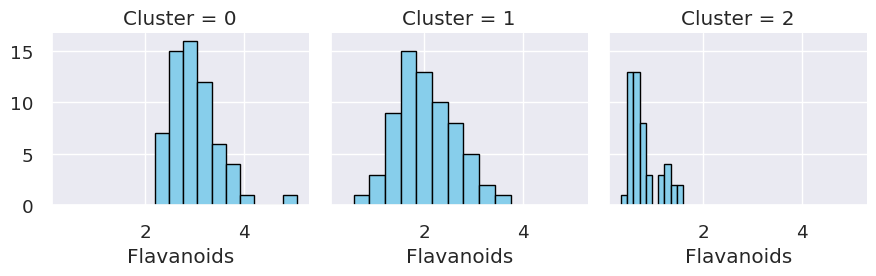

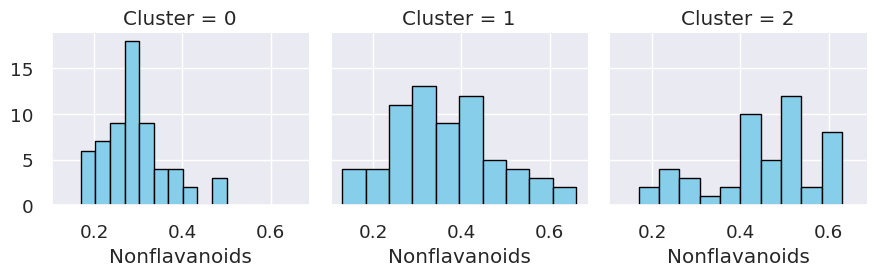

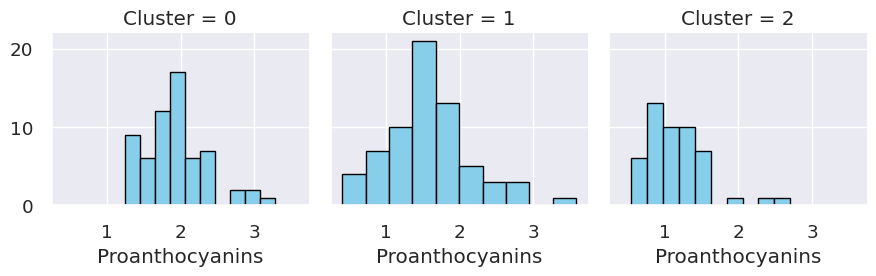

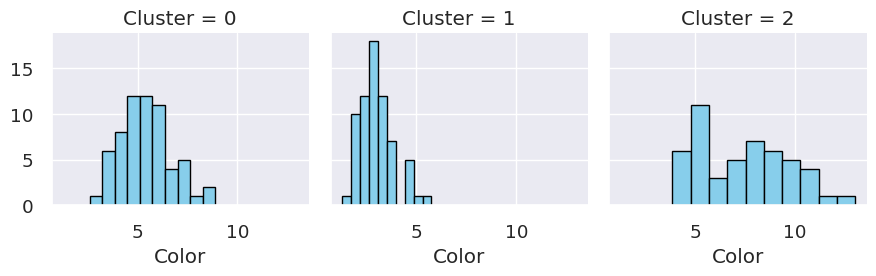

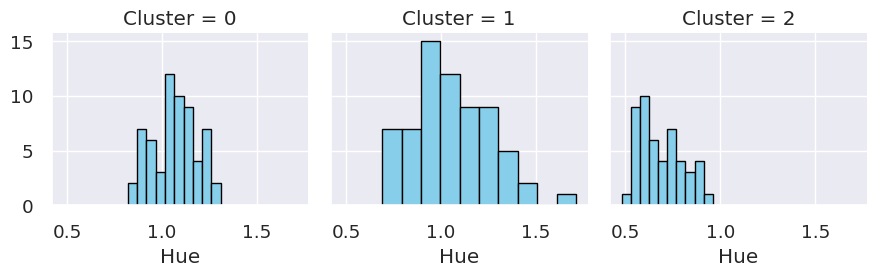

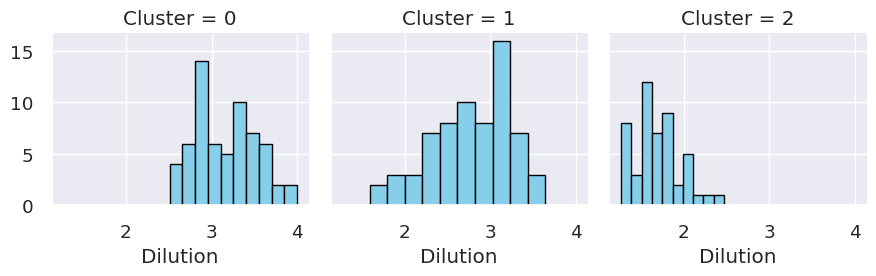

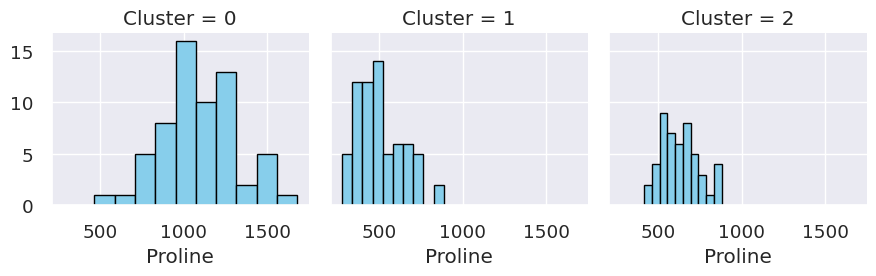

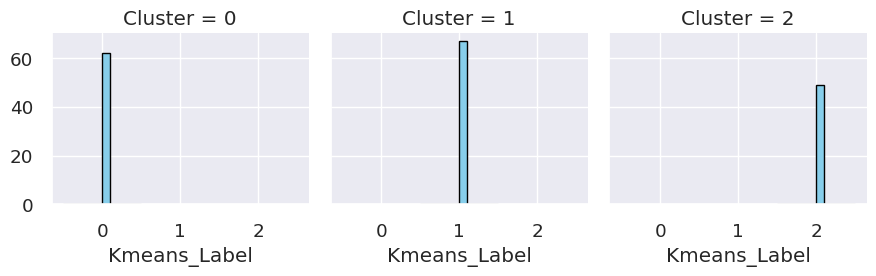

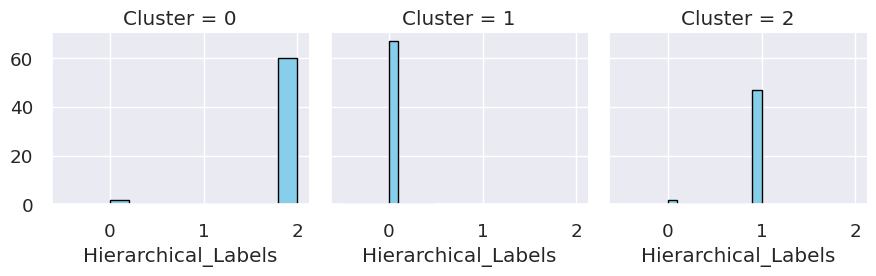

In [100]:
wine_df2 = wine_data.copy()
wine_df2['Cluster'] = model_kmeans.labels_

aux = wine_df2.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(15,10)}, font_scale=1.2)
for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(wine_df2, col= 'Cluster')
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [101]:
cluster1 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==1].mean(),columns= ['Cluster2_Avg'])
cluster3 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==2].mean(),columns= ['Cluster2_Avg'])
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

,Cluster1_Avg,Cluster2_Avg,Cluster2_Avg
Type,1.048387,2.000000,2.979592
Alcohol,13.676774,12.264478,13.151633
Malic,1.997903,1.912239,3.344490
Ash,2.466290,2.224328,2.434694
Alcalinity,17.462903,19.953731,21.438776
Magnesium,107.967742,92.656716,99.020408
Phenols,2.847581,2.235075,1.678163
Flavanoids,3.003226,2.028507,0.797959
Nonflavanoids,0.292097,0.361343,0.450816
Proanthocyanins,1.922097,1.597313,1.163061


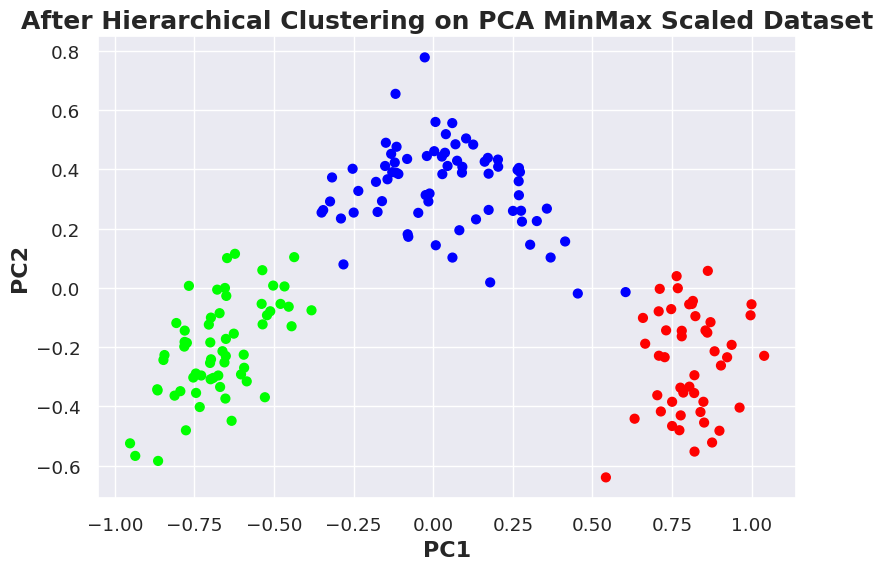

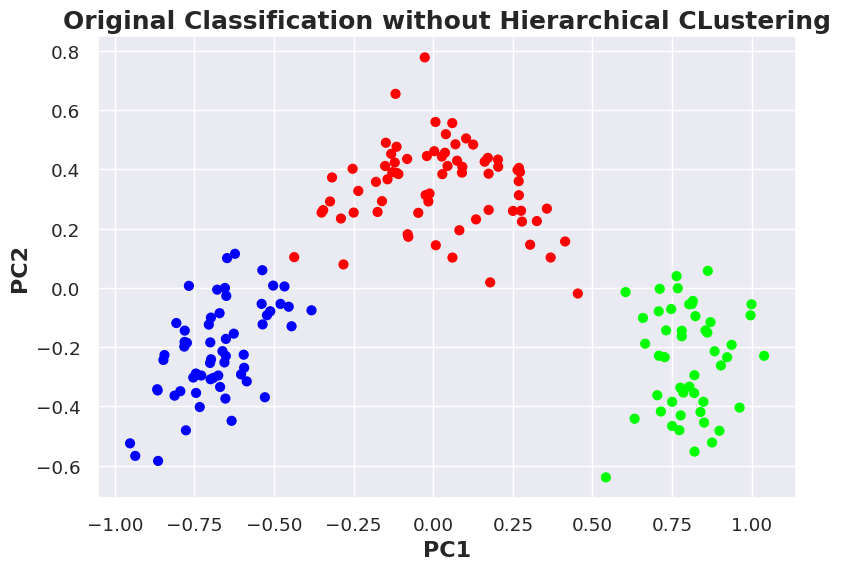

In [102]:
#Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_data['Hierarchical_Labels'], cmap="brg", s=40)
plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_data['Type'], cmap="brg", s=40)
plt.title('Original Classification without Hierarchical CLustering', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

In [103]:
display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',wine_data.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',wine_data.groupby('ID').agg(['mean']).head())


'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,2.014085,12.276901,1.928169,2.240845,20.069014,94.309859,2.233662,2.057746,0.363662,1.615915,3.097183,1.048535,2.754225,514.507042,1.0
1,3.000000,13.160000,3.375957,2.439574,21.489362,98.829787,1.682340,0.771489,0.452553,1.158085,7.466383,0.681064,1.691915,629.893617,2.0
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333,0.0


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,,,,
1,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,2.0
2,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,2.0
3,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,2.0
4,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,2.0
5,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,2.0


### **Conclusion:**

I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.

Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively. I have used & analyzed two clustering techniques here..i) KMeans ii) Hierarchical Clusterig

By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building